<img src="https://uploads-ssl.webflow.com/5d4462a939958fb85d61acc2/5d60380ecf10ece841380ee0_ico_brand.svg" width=300/> 


# DS-1: Introduction To Data Science
## PROJECT: RESTAURANT RECOMMENDATION SYSTEM

**DS-1 Cohort 2**<br/>
<font color='blue'>**Univ.AI**<br/></font>
**Instructor**: Prof. Ignacio Becker, Dr. Pavlos Protopapas, Dr. Rahul Dave<br />

<hr style="height:2.4pt">

## Name of people who have worked on this project: <font color='red'>**Bhaskar Bharat**, **Ekanki Agarwal**, **Sarath Manoj** and **Srish Kulkarni**</font>

<font color='red'>**Content Based Recommendation Notebook Link: https://colab.research.google.com/drive/1NNStgonzWLW7GGjvnYk-lt4jIkcqFMgp?usp=sharing**<br><br>**Content Based Recommendation Files Link: https://drive.google.com/drive/folders/1ErWANgQkVyg07L1jJlw7I286dQiF6KHC?usp=sharing**</font>

## <font color='red'>**All the necessary files can be found at this url: https://drive.google.com/drive/folders/1ZzWTOoyZ3zgPnFtlYYvdZnN0L0TBZ6-_?usp=sharing**</font>

# Downloading the Dataset

## Download Kaggle API Credentials
Source: https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

To download data from Kaggle, you need to authenticate with the Kaggle services. For this purpose, you need an API token. This token can be easily generated from the profile section of your Kaggle account. Simply, navigate to your Kaggle profile and then,

![Kaggle-API-Token.png](https://editor.analyticsvidhya.com/uploads/82084ds.PNG)

Click the Account tab and then scroll down to the API section (Screenshot from Kaggle profile)

A file named “kaggle.json” will be download which contains the username and the API key.

This is a one-time step and you don’t need to generate the credentials every time you download the dataset.

## Setup the Colab Notebook

Fire up a Google Colab notebook and connect it to the cloud instance (basically start the notebook interface). Then, upload the “kaggle.json” file that you just downloaded from Kaggle.

![Colab-Screenshot.png](https://editor.analyticsvidhya.com/uploads/56124e.PNG)

Now you are all set to run the commands need to load the dataset. Follow along with these commands:

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download yelp-dataset/yelp-dataset

100% 4.92G/4.92G [00:54<00:00, 113MB/s] 
100% 4.92G/4.92G [00:54<00:00, 97.1MB/s]


In [3]:
! unzip /content/yelp-dataset.zip

Archive:  /content/yelp-dataset.zip
  inflating: Dataset_User_Agreement.pdf  
  inflating: yelp_academic_dataset_business.json  
  inflating: yelp_academic_dataset_checkin.json  
  inflating: yelp_academic_dataset_review.json  
  inflating: yelp_academic_dataset_tip.json  
  inflating: yelp_academic_dataset_user.json  


In [4]:
! rm /content/yelp-dataset.zip

# Importing Libraries

In [5]:
# Installing h5py package to work with .h5 file formats
!pip install h5py==2.10.0 --force-reinstall

     |████████████████████████████████| 2.9 MB 5.3 MB/s 
     |████████████████████████████████| 15.7 MB 166 kB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.

In [6]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 425 kB/s 
     |████████████████████████████████| 6.3 MB 34.2 MB/s 


In [7]:
!pip install plotly_express

In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns
# import plotly.express as px
import folium  
from IPython.display import HTML
import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")

from sqlite3 import dbapi2 as sq3
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K
import tensorflow.keras as keras
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Input, Embedding, Add, Dot, Flatten
from tensorflow.keras import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.losses import cosine_similarity

import pydot
from IPython.display import SVG
from operator import itemgetter
from collections import OrderedDict
import json
import time
import pickle

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset Paths

business_json_path = "/content/yelp_academic_dataset_business.json"
checkin_json_path = "/content/yelp_academic_dataset_checkin.json"
review_json_path = "/content/yelp_academic_dataset_review.json"
tip_json_path = "/content/yelp_academic_dataset_tip.json"
user_json_path = "/content/yelp_academic_dataset_user.json"

In [ ]:
# Files and Model Saving Path (Use your system path here)
# db_path = "/content/"
file_path = "/content/drive/MyDrive/Colab Notebooks/DS1-Project/processed_data/"
model_path = "/content/drive/MyDrive/Colab Notebooks/DS1-Project/models/"

# Set up a connection and populate the SQLite database

## Step 1: Connect and get a DBAPI2 connection.

In [ ]:
# Define a function to connect to the database and execute the schema to set up the tables and the columns data types
def init_db(dbfile, schema):
  # Connecting to the database
  db = sq3.connect(Path(dbfile))
  # Creating the database tables
  db.cursor().executescript(schema)
  db.commit()
  return db

#Defining a function to make a query
def make_query(sel):
  c = db.cursor().execute(sel)
  return c.fetchall()

# Defining a function to convert the ouputs to a pandas dataframe
# Import OrderedDict to remember the order in which keys were inserted
from collections import OrderedDict
def make_frame(list_of_tuples, legend):
  framelist=[]
  for i, cname in enumerate(legend):
      framelist.append((cname,[e[i] for e in list_of_tuples]))
  return pd.DataFrame.from_dict(OrderedDict(framelist))

In [ ]:
#Table Schema for tables in our SQLite database

users_schema = """
DROP TABLE IF EXISTS "users";

CREATE TABLE "users" (
    "user_id" INTEGER PRIMARY KEY NOT NULL,
    "name" VARCHAR,
    "review_count" INTEGER,
    "yelping_since" TIMESTAMP,
    "friends" VARCHAR,
    "useful" INTEGER,
    "funny" INTEGER,
    "cool" INTEGER,
    "fans" INTEGER,
    "elite" VARCHAR,
    "average_stars" FLOAT,
    "compliment_hot" INTEGER,
    "compliment_more" INTEGER, 
    "compliment_profile" INTEGER,
    "compliment_cute" INTEGER,
    "compliment_list" INTEGER,
    "compliment_note" INTEGER,
    "compliment_plain" INTEGER,
    "compliment_cool" INTEGER,
    "compliment_funny" INTEGER,
    "compliment_writer" INTEGER,
    "compliment_photos" INTEGER
);
"""
businesses_schema="""
DROP TABLE IF EXISTS "businesses";

CREATE TABLE "businesses" (
    "business_id" INTEGER PRIMARY KEY NOT NULL,
    "name" VARCHAR,
    "address" VARCHAR,
    "city" VARCHAR,
    "state" VARCHAR,
    "postal_code" VARCHAR,
    "latitude" FLOAT,
    "longitude" FLOAT,
    "stars" FLOAT,
    "review_count" INTEGER,
    "is_open" BOOLEAN,
    "attributes" VARCHAR,
    "categories" VARCHAR,
    "hours" VARCHAR
);
"""
reviews_schema = """
DROP TABLE IF EXISTS "reviews";

CREATE TABLE "reviews" (
    "review_id" VARCHAR PRIMARY KEY,
    "user_id" INTEGER,
    "business_id" INTEGER,
    "stars" FLOAT,
    "date" TIMESTAMP,
    "text"  VARCHAR,
    "useful" INTEGER,
    "funny" INTEGER,
    "cool" INTEGER,
    
    
    
    
    FOREIGN KEY (user_id) REFERENCES users(user_id),
    FOREIGN KEY (business_id) REFERENCES businesses(business_id)
);
"""

checkins_schema = """
DROP TABLE IF EXISTS "checkins";

CREATE TABLE "checkins" (
    "business_id" INTEGER,
    "date" VARCHAR,
    "num_checkins" INTEGER,
    
    
    FOREIGN KEY (business_id) REFERENCES businesses(business_id)
);
"""

schema_close = ");"

# Data Preprocessing

## Preprocessing business.json

In [ ]:
# Loading business.json file
business_df = pd.read_json(business_json_path, lines=True)
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [ ]:
# Checking shape of business_df
business_df.shape

(160585, 14)

In [ ]:
# Checking dtypes of business_df columns
business_df.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

In [ ]:
# Checking for null values in business_df
business_df.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      14992
categories        115
hours           27341
dtype: int64

In [ ]:
# Since columns with dtype='object' have null values. We are replacing null values as 'NA'
business_df = business_df.fillna('NA')
business_df.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64

In [ ]:
# Keeping businesses where categories contains 'Restaurants' and is_open == 1
business_df = business_df[(business_df['categories'].str.contains('Restaurants')) & (business_df['is_open'] == 1)]
business_df.shape

(32022, 14)

In [ ]:
top_restaurants = business_df.sort_values(by=['review_count', 'stars'], ascending=False)[:20]
top_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants
64048,4CxF8c3MB7VAdY8zFb2cZQ,Voodoo Doughnut - Old Town,22 SW 3rd Ave,Portland,OR,97204,45.522612,-122.673084,3.5,9185,1,"{'RestaurantsPriceRange2': '1', 'BikeParking':...","Local Flavor, Food, Donuts, Wedding Chapels, E...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-21:0', '...",True
113608,PrsvO1rzkgg6qFizlAoEtg,Mike's Pastry,300 Hanover St,Boston,MA,02113,42.364181,-71.054218,4.0,7298,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Candy Stores, Gelato, Food, Coffee & Tea, Rest...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",True
42375,OQ2oHkcWA8KNC1Lsvj1SBA,Screen Door,2337 E Burnside St,Portland,OR,97214,45.523086,-122.641680,4.5,7219,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Caterers, Restaurants, Breakfast & Brunch, Sou...","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...",True
25571,zioLxtBc9THNS2TOn9xW1w,Pok Pok,3226 SE Division St,Portland,OR,97202,45.504723,-122.632105,4.0,6221,0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Asian Fusion, Pan Asian, Thai, Fi...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:...",True
145385,y2w6rFaO0XEiG5mFfOsiFA,Neptune Oyster,63 Salem St,Boston,MA,02113,42.363237,-71.055975,4.5,5115,1,"{'NoiseLevel': 'u'average'', 'RestaurantsAttir...","Arabian, Thai, American (Traditional), Live/Ra...","{'Monday': '11:30-21:30', 'Tuesday': '11:30-21...",True


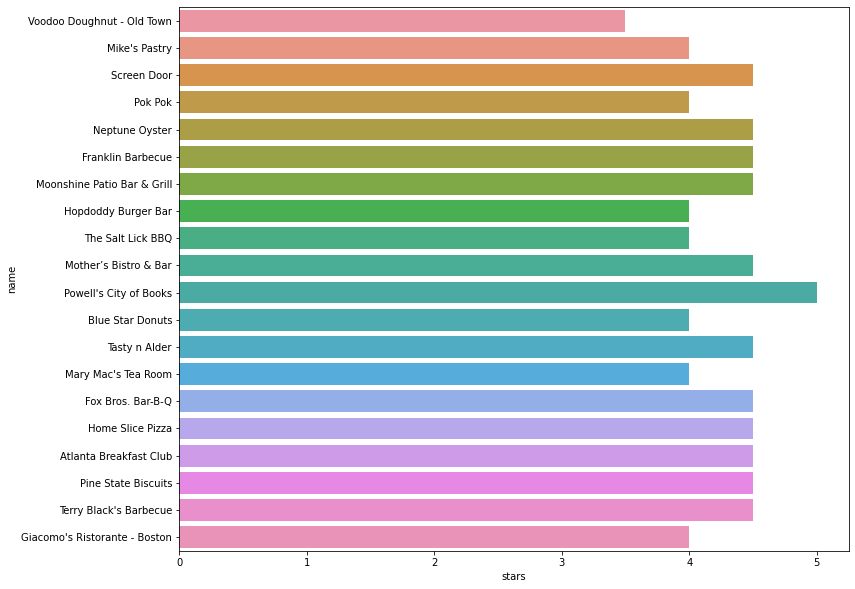

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x = 'stars', y = 'name', data=top_restaurants, ax= ax);
plt.savefig('top20_restaurants.png')
plt.show()

In [ ]:
# px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
#configure_plotly_browser_state()
px.scatter_mapbox(df_restaurants, lat="latitude", lon="longitude", color="stars", size='review_count' ,
                   size_max=30, zoom=3, width=1200, height=800)

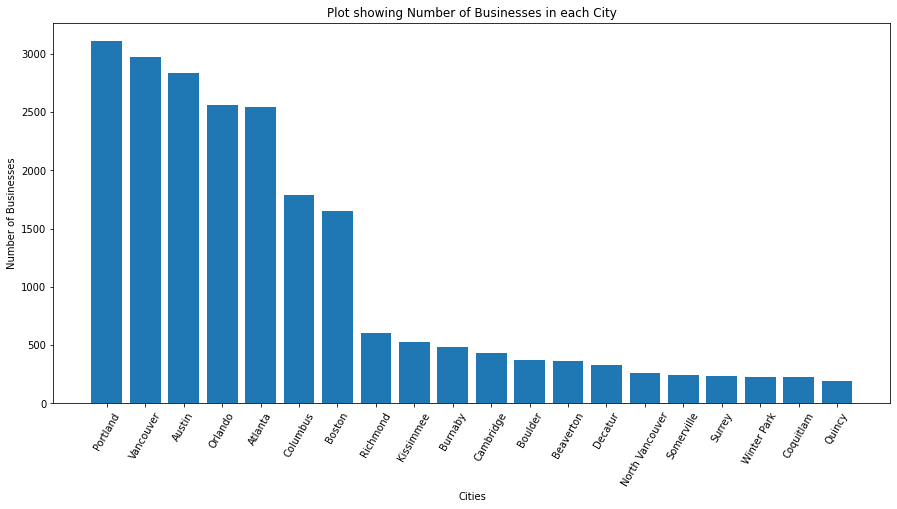

In [ ]:
city_dict = business_df['city'].value_counts().to_dict()

fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(list(city_dict.keys())[:20], list(city_dict.values())[:20])
ax.set_xticklabels(labels=list(city_dict.keys())[:20], rotation=60)
ax.set_xlabel('Cities')
ax.set_ylabel('Number of Businesses')
ax.set_title('Plot showing Number of Businesses in each City')

del city_dict

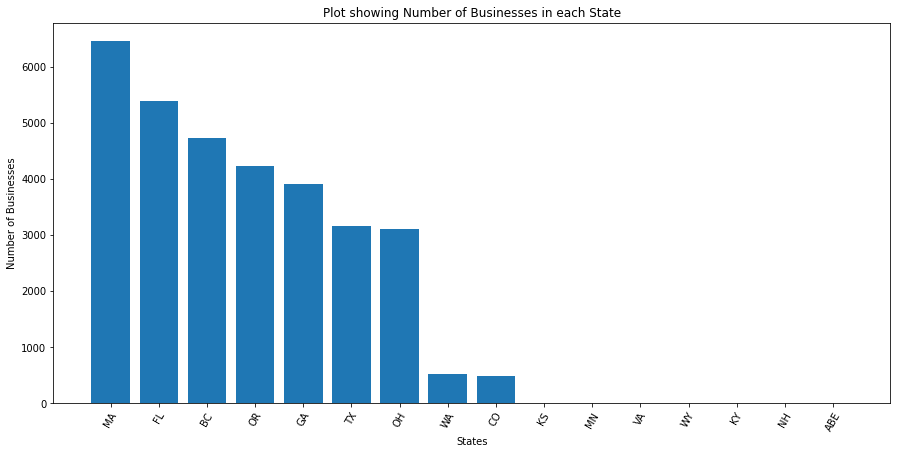

In [ ]:
state_dict = business_df['state'].value_counts().to_dict()

fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(list(state_dict.keys())[:], list(state_dict.values())[:])
ax.set_xticklabels(labels=list(state_dict.keys())[:], rotation=60)
ax.set_xlabel('States')
ax.set_ylabel('Number of Businesses')
ax.set_title('Plot showing Number of Businesses in each State')

del state_dict

#### Taking only the Top 2 Cities with the most number of businesses

In [ ]:
# Taking only the Top 2 Cities with the most number of businesses
business_df = business_df[business_df['city'].isin(list(business_df['city'].value_counts().index[:2]))]
business_df['city'].unique()

array(['Portland', 'Vancouver'], dtype=object)

In [ ]:
# px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig = px.scatter_mapbox(business_df, lat="latitude", lon="longitude", color="stars", size='review_count',
                  hover_data= ['name'], size_max=30, zoom=3, width=1200, height=800)
fig.update_layout(title = 'Restaurants Locations', title_x=0.5)
fig.show()

In [ ]:
business_df.shape

(6085, 14)

In [ ]:
business = business_df['business_id'].unique()
businessid2idx = {o:i for i,o in enumerate(business)}
business_df['business_id'] = business_df['business_id'].apply(lambda x: businessid2idx[x])
business_names = dict(zip(business_df[['business_id', 'name']].set_index('business_id').index.to_list(), list(business_df[['business_id', 'name']].set_index('business_id').values.ravel())))

In [ ]:
business_df['attributes'] = business_df['attributes'].apply(lambda x: str(x))
business_df['hours'] = business_df['hours'].apply(lambda x: str(x))

In [ ]:
# Saving businessid2idx to json
a_file = open(file_path+"businessid2idx.json", "w")
json.dump(businessid2idx, a_file)

# Saving business_names to json
a_file = open(file_path+"business_names.json", "w")
json.dump(business_names, a_file)

In [ ]:
# Saving business_df as csv
business_df.to_csv(file_path+"business_df.csv", index=False)

In [ ]:
# # Loading business_df.csv
# business_df = pd.read_csv(file_path+"business_df.csv")

In [ ]:
# # Loading businessid2idx.json
# a_file = open(file_path+"businessid2idx.json", "r")
# businessid2idx = json.load(a_file)

# # Loading business_names.json
# a_file = open(file_path+"business_names.json", "r")
# business_names = json.load(a_file)

In [ ]:
# #Create db
# db = init_db(file_path+"yelp_database.db", users_schema+businesses_schema+reviews_schema+checkins_schema)

# #business data to sql
# business_df.to_sql('businesses', db, if_exists='append', index=False)

In [ ]:
# #release memory
# del business_df

## Preprocessing checkin.json

In [ ]:
# Loading checkin.json file
checkin_df = pd.read_json(checkin_json_path, lines=True)
checkin_df.head()

,business_id,date
0,--0r8K_AQ4FZfLsX3ZYRDA,2017-09-03 17:13:59
1,--0zrn43LEaB4jUWTQH_Bg,"2010-10-08 22:21:20, 2010-11-01 21:29:14, 2010..."
2,--164t1nclzzmca7eDiJMw,"2010-02-26 02:06:53, 2010-02-27 08:00:09, 2010..."
3,--2aF9NhXnNVpDV0KS3xBQ,"2014-11-03 16:35:35, 2015-01-30 18:16:03, 2015..."
4,--2mEJ63SC_8_08_jGgVIg,"2010-12-15 17:10:46, 2013-12-28 00:27:54, 2015..."


In [ ]:
# Checking shape of checkin_df
checkin_df.shape

(138876, 2)

In [ ]:
# Checking if there are null values in checkin_df
checkin_df.isnull().sum()

business_id    0
date           0
dtype: int64

In [ ]:
# Considering only those business_ids that are there in the business_df
checkin_df = checkin_df[checkin_df['business_id'].isin(list(businessid2idx.keys()))]

In [ ]:
checkin_df['business_id'] = checkin_df['business_id'].apply(lambda x: businessid2idx[x])

In [ ]:
checkin_df['num_checkins'] = checkin_df['date'].apply(lambda x: len(x.split(',')))

In [ ]:
checkin_df.head()

,business_id,date,num_checkins
11,2593,"2010-02-07 05:58:54, 2010-02-21 04:14:22, 2010...",2324
13,4436,"2015-11-28 01:53:03, 2015-12-17 05:14:15, 2016...",47
57,1657,"2017-03-18 01:51:23, 2017-04-16 22:32:47, 2017...",27
63,1982,"2010-07-30 00:10:38, 2010-08-28 22:18:59, 2010...",106
91,1159,"2014-06-27 00:36:52, 2014-07-11 21:25:20, 2014...",148


In [ ]:
# Saving checkin_df as csv
checkin_df.to_csv(file_path+"checkin_df.csv", index=False)

In [ ]:
# # Loading checkin_df.csv
# checkin_df = pd.read_csv(file_path+"checkin_df.csv")

In [ ]:
# #checkin data to sql
# checkin_df.to_sql('checkins', db, if_exists='append', index=False)

# #release memory
# del checkin_df

## Preprocessing review.json

In [ ]:
review_df_iter = pd.read_json(review_json_path, chunksize=500000, lines=True,
                              dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'date':str,'text':str,'useful':int,
                             'funny':int,'cool':int})

In [ ]:
review_df = pd.DataFrame()
i=0
for df in review_df_iter:
    df = df[df['business_id'].isin(list(businessid2idx.keys()))]
    review_df = pd.concat([review_df, df])
    i=i+1
    print(i)
#     if i==12: break
review_df

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
17,ucFOnqgaV40oQ2YNyz5ddQ,JHXQEayrDHOWGexs0dCviA,KXCXaF5qimmtKKqnPc_LQA,1,0,0,0,Great coffee and pastries. Baristas are excell...,2018-03-03 23:45:25
22,1OsubwE6zKNU1fkBGxOFrQ,vFnYYmtVwcMGyyGesNImVQ,jMz_y_-cWMfiZF7Q5snE6Q,5,0,0,0,Ordered the original tonkotsu base ramen and a...,2016-01-30 02:39:22
35,nJTSr-EGNhhA5o146THkPg,T9O5pkKKlNvr-qqfefDlbA,luOZQ9YBrWwP8mYrS4rNoA,4,2,0,0,This place has some of the BEST chinese take-o...,2008-12-03 04:39:26
40,KeyNH8Jj05BZGtqjgCFnTg,M20pTzUOo2yD5Cuh5shjSA,M4jkJHewQXZvDV34Tuon8g,1,0,0,0,Had the worst experience there today when I tr...,2014-08-10 20:40:15
47,P320Yt8vFD3yjI34hq-umg,IMfkbLVt_GJfD7zJ9T4fcw,VPqWLp9kMiZEbctCebIZUA,3,0,0,0,"Overall is good, is worth the line up I don't ...",2018-09-25 03:22:50
...,...,...,...,...,...,...,...,...,...
8635383,Jb-s2yxGrwVzaSWFd-lwQQ,_6up_KUwL5RsuWtK8fQxXg,vXTo69v2bGEyuBdT0X1hrw,5,3,1,1,"Based on the super positive Yelp reviews, I to...",2010-01-30 07:53:00
8635389,D0IPxwXzxbsSf_0cfSE74w,zxzgFCdxM7bX63ZVpJgk4g,kwHcdJttuelU1TTZVDovbw,5,0,0,0,"My family and I are longtime patrons of TOC, a...",2020-12-25 09:41:16
8635391,XpVatkv32ZiY3Mv_cR26Mw,UvlvbgQaADuIoE2bEQYJ1A,_VF1CWhsQWv77Yi92ORo1w,5,0,0,0,Wonderful! We stopped in twice while taking ou...,2021-01-20 20:07:19
8635397,FfhmA0G0zrRjHskp-7O8UQ,IlxM3NGJOtNXPz5cupqNDQ,dmkDZKPsK8lmwFuLiFQ0Zw,5,0,0,0,Yes please! We had the Arepas falafel style an...,2021-01-25 14:53:13


In [ ]:
# Checking shape of review_df
review_df.shape

(826212, 9)

In [ ]:
# Checking if there are null values in review_df
review_df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [ ]:
# review_count_df = review_df.groupby(by='business_id')['stars'].agg(['sum', 'mean', 'count']).reset_index()
# review_count_df

In [ ]:
# review_count_df[review_count_df['business_id'] == "jFYIsSb7r1QeESVUnXPHBw"]

In [ ]:
review_df['business_id'] = review_df['business_id'].apply(lambda x: businessid2idx[x])

In [ ]:
users = review_df['user_id'].unique()
userid2idx = {o:i for i,o in enumerate(users)}
review_df['user_id'] = review_df['user_id'].apply(lambda x: userid2idx[x])

In [ ]:
# Saving userid2idx to json
a_file = open(file_path+"userid2idx.json", "w")
json.dump(userid2idx, a_file)

In [ ]:
# # Loading userid2idx.json
# a_file = open(file_path+"userid2idx.json", "r")
# userid2idx = json.load(a_file)

In [ ]:
# # Loading review_df.csv
# review_df = pd.read_csv(file_path+"review_df.csv")

In [ ]:
nusers = review_df['user_id'].nunique()
nbusiness = review_df['business_id'].nunique()
nusers, nbusiness

(281157, 6085)

In [ ]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,ucFOnqgaV40oQ2YNyz5ddQ,0,551,1,0,0,0,Great coffee and pastries. Baristas are excell...,2018-03-03 23:45:25
1,1OsubwE6zKNU1fkBGxOFrQ,1,93,5,0,0,0,Ordered the original tonkotsu base ramen and a...,2016-01-30 02:39:22
2,nJTSr-EGNhhA5o146THkPg,2,192,4,2,0,0,This place has some of the BEST chinese take-o...,2008-12-03 04:39:26
3,KeyNH8Jj05BZGtqjgCFnTg,3,197,1,0,0,0,Had the worst experience there today when I tr...,2014-08-10 20:40:15
4,P320Yt8vFD3yjI34hq-umg,4,185,3,0,0,0,"Overall is good, is worth the line up I don't ...",2018-09-25 03:22:50


In [ ]:
# Saving review_df as csv
review_df.to_csv(file_path+"review_df.csv", index=False)

In [ ]:
# #review data to sql
# review_df.to_sql('reviews', db, if_exists='append', index=False)

# #release memory
# del review_df

## Preprocessing user.json

In [ ]:
user_df_iter = pd.read_json(user_json_path, chunksize=500000, lines=True,
                              dtype={"user_id": str,
                                     "name": str,
                                     "review_count": int,
                                     "yelping_since": str,
                                     "friends": str,
                                     "useful": int,
                                     "funny": int,
                                     "cool": int,
                                     "fans": int,
                                     "elite": str,
                                     "average_stars": float,
                                     "compliment_hot": int,
                                     "compliment_more": int,
                                     "compliment_profile": int,
                                     "compliment_cute": int,
                                     "compliment_list": int,
                                     "compliment_note": int,
                                     "compliment_plain": int,
                                     "compliment_cool": int,
                                     "compliment_funny": int,
                                     "compliment_writer": int,
                                     "compliment_photos": int})

In [ ]:
user_df = pd.DataFrame()
i=0
for df in user_df_iter:
    df = df[df['user_id'].isin(list(userid2idx.keys()))]
    user_df = pd.concat([user_df, df])
    i=i+1
    print(i)
#     if i==12: break
user_df

1
2
3
4
5


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
1,dIIKEfOgo0KqUfGQvGikPg,Gabi,2136,2007-08-10 19:01:51,21272,10289,18046,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2...","XPzYf9_mwG2eXYP2BAGSTA, 2LooM5dcIk2o01nftYdPIg...",1025,4.09,1632,87,94,232,96,1187,3293,2205,2205,472,294
2,D6ErcUnFALnCQN4b1W_TlA,Jason,119,2007-02-07 15:47:53,188,128,130,"2010,2011","GfB6sC4NJQvSI2ewbQrDNA, jhZtzZNNZJOU2YSZ6jPlXQ...",16,3.76,22,1,3,0,0,5,20,31,31,3,1
3,JnPIjvC0cmooNDfsa9BmXg,Kat,987,2009-02-09 16:14:29,7234,4722,4035,"2009,2010,2011,2012,2013,2014","HQZPQhKMwRAyS6BCselVWQ, kP2U1s_sjQfHO9grxiyDTA...",420,3.77,1180,129,93,219,90,1120,4510,1566,1566,391,326
4,37Hc8hr3cw0iHLoPzLK6Ow,Christine,495,2008-03-03 04:57:05,1577,727,1124,"2009,2010,2011","-Q88pZUcrfN0BLBDp-bkAQ, etPn4Pv1Gc4cRZjRgB_BOw...",47,3.72,248,19,32,16,15,77,131,310,310,98,44
7,cojecOwQJpsYDxnjtgzteQ,Steven,51,2010-07-04 17:18:40,136,47,44,"2010,2011","_Tpd51CSlnOyvDTpOtgG5w, jVYzrVblDFSuL3GHtt8ZSA...",4,3.79,4,5,2,1,0,4,6,12,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189383,PgDtgKXjqabbklIy8cnFEA,Mike,22,2011-05-21 19:16:17,9,0,1,,None,0,4.39,0,0,0,0,0,1,0,0,0,0,0
2189403,_s0-JQQw7NJOE6lZd-khmw,Alex,4,2016-05-04 01:21:43,0,0,0,,None,0,3.60,0,0,0,0,0,0,0,0,0,0,0
2189413,icBK1FERu8d_uU6cBwy2Uw,Christian,1,2019-03-14 20:35:45,0,0,0,,None,0,5.00,0,0,0,0,0,0,0,0,0,0,0
2189417,x5NtcWQHXnLcYBKr37bx2A,Sally,1,2020-10-06 18:25:07,0,0,0,,None,0,1.00,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Checking shape of user_df
user_df.shape

(281157, 22)

In [ ]:
# Checking if there are null values in user_df
user_df.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

In [ ]:
# tmp = review_df.groupby(by='user_id')['review_id'].agg(['count']).reset_index()
# tmp.head()

In [ ]:
# tmp[tmp['user_id']=='q_QQ5kBBwlCcbL1s4NVK3g']

In [ ]:
# 100*(tmp['count'].value_counts() / len(tmp))

In [ ]:
user_df['user_id'] = user_df['user_id'].apply(lambda x: userid2idx[x])
user_names = dict(zip(user_df[['user_id', 'name']].set_index('user_id').index.to_list(), list(user_df[['user_id', 'name']].set_index('user_id').values.ravel())))

In [ ]:
# Saving user_names to json
a_file = open(file_path+"user_names.json", "w")
json.dump(user_names, a_file)

In [ ]:
# # Loading user_names.json
# a_file = open(file_path+"user_names.json", "r")
# user_names = json.load(a_file)

In [ ]:
# Saving the user_df as csv
user_df.to_csv(file_path+"user_df.csv", index=False)

In [ ]:
# # Loading user_df.csv
# user_df = pd.read_csv(file_path+"user_df.csv")

In [ ]:
# #user data to sql
# user_df.to_sql('users', db, if_exists='append', index=False)

# #release memory
# del user_df

# Exploratory Data Analysis

## business.json EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



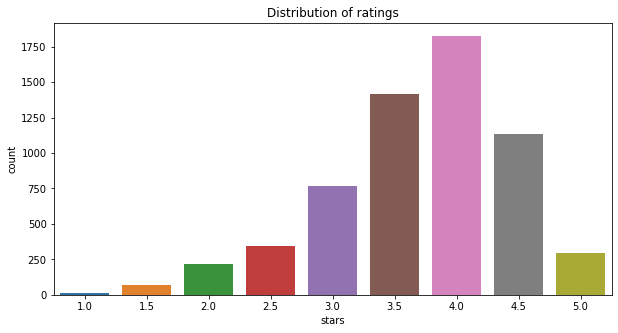

In [ ]:
# Distribution of ratings for different businesses
plt.figure(figsize=(10,5))
sns.countplot(business_df.stars)
plt.title("Distribution of ratings")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



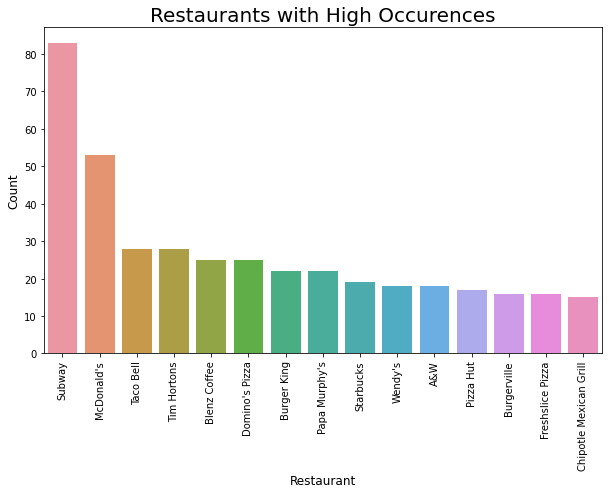

In [ ]:
res_count = business_df.name.value_counts()
res_count = res_count.sort_values(ascending = False)
res_count = res_count.iloc[0:15]
fig = plt.figure(figsize=(10, 6))
sns.barplot(res_count.index, res_count.values)
plt.title("Restaurants with High Occurences",fontsize = 20)
x_locs,x_labels = plt.xticks()
plt.setp(x_labels, rotation = 90)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Restaurant', fontsize = 12);

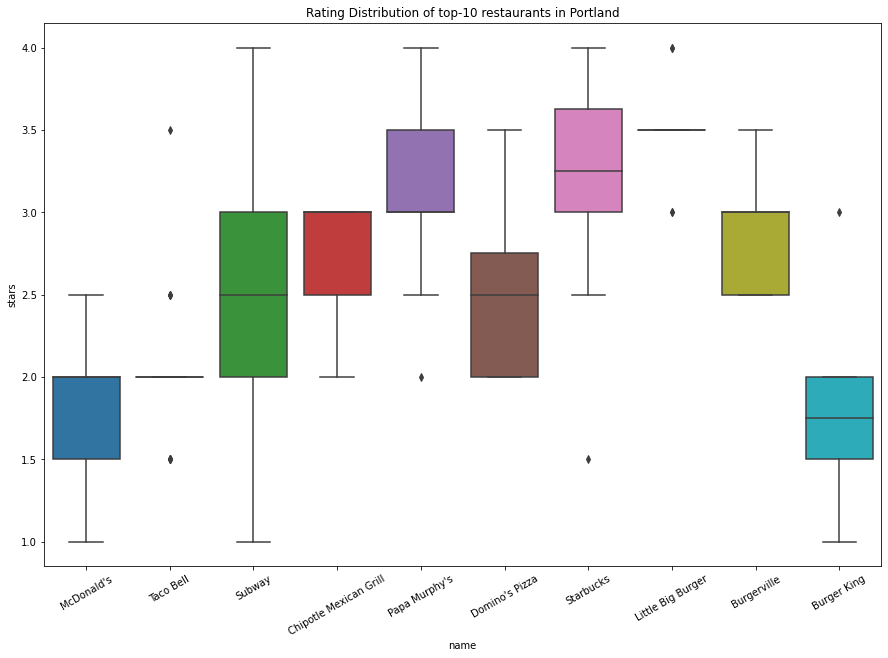

In [ ]:
portland_df = business_df[business_df['city']=='Portland']
plt.figure(figsize=(15,10))
sns.boxplot(x = 'name', y = 'stars', data = portland_df[portland_df.name.isin(portland_df.name.value_counts().sort_values(ascending = False)[:10].index)])
plt.xticks(rotation=30)
plt.title("Rating Distribution of top-10 restaurants in Portland")
plt.show()

#K-Means Clustering

In [ ]:
port = business_df[business_df['city'] == 'Portland']

##Determining the number of clusters(K)

In [ ]:
# Elbow method to determine the number of K in Kmeans Clustering
coords = port[['longitude','latitude']]

distortions = []
K = range(1,25)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)

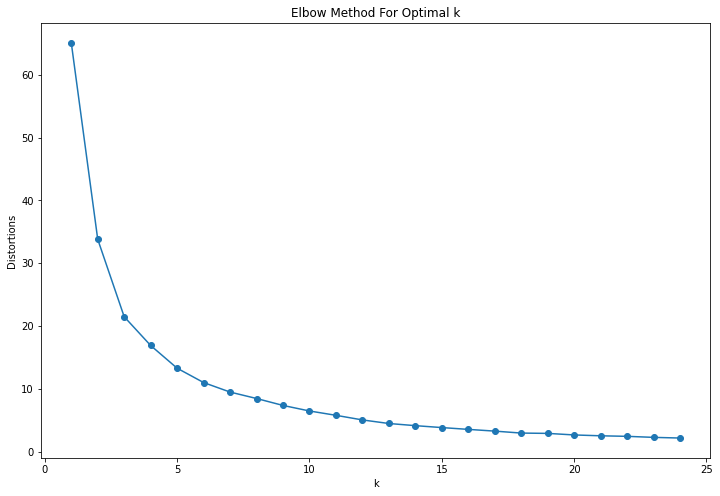

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.savefig('elbow.png')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 50

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(coords)
  labels = kmeans.labels_
  sil.append(silhouette_score(coords, labels, metric = 'euclidean'))

## K-Means Clustering


In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
print("k = 5", " silhouette_score ", silhouette_score(coords, y, metric='euclidean'))

k = 5  silhouette_score  0.4656971679403648


In [ ]:
port['cluster'] = kmeans.predict(port[['longitude','latitude']])
port.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants,cluster
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",True,3
36,jx91IMdGOmLOo8h_F9z39g,Cleary's Restaurant & Spirits,12429 NE Glisan St,Portland,OR,97230,45.526473,-122.535323,3.5,19,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Nightlife, Sandwiches, Seafood, Restaurants","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",True,3
50,5PsApTz-WqhF_-8mfqGtGw,Cafe Yumm!,301 SW Morrison St,Portland,OR,97204,45.518450,-122.675723,3.5,158,1,"{'OutdoorSeating': 'True', 'GoodForKids': 'Tru...","Vegetarian, Vegan, Sandwiches, Soup, American ...","{'Monday': '10:0-17:0', 'Tuesday': '10:0-17:0'...",True,2
93,HMXiuCxHDXqMH1hBpaHd9g,Whole Time Chicken,,Portland,OR,97215,45.516241,-122.597527,5.0,7,0,"{'OutdoorSeating': 'True', 'RestaurantsTableSe...","Food Stands, Restaurants, Sandwiches","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...",True,3
94,ZA3u0Nu5V6TqkcYh8U0zdg,B Street Coffee House,2190 W Burnside St,Portland,OR,97210,45.523074,-122.696206,4.5,131,0,"{'Caters': 'False', 'RestaurantsAttire': 'u'ca...","Restaurants, Food, Sandwiches, Breakfast & Bru...","{'Monday': '6:30-15:0', 'Tuesday': '6:30-15:0'...",True,2


In [ ]:
px.scatter_mapbox(port, lat="latitude", lon="longitude", color="cluster", size='review_count', 
                  hover_data= ['name', 'latitude', 'longitude'], zoom=10, width=1200, height=800)

## user.json

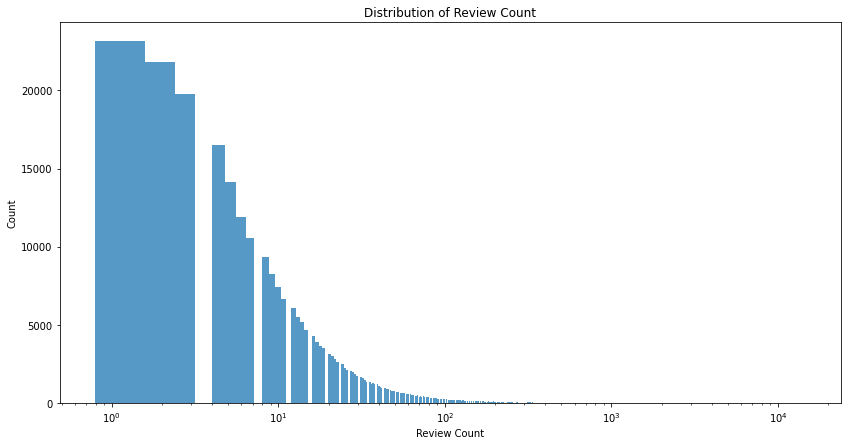

In [ ]:
fig=plt.figure(figsize=(14,7))
sns.histplot(user_df.review_count)
plt.xscale('log')
plt.xlabel('Review Count')
plt.title('Distribution of Review Count');

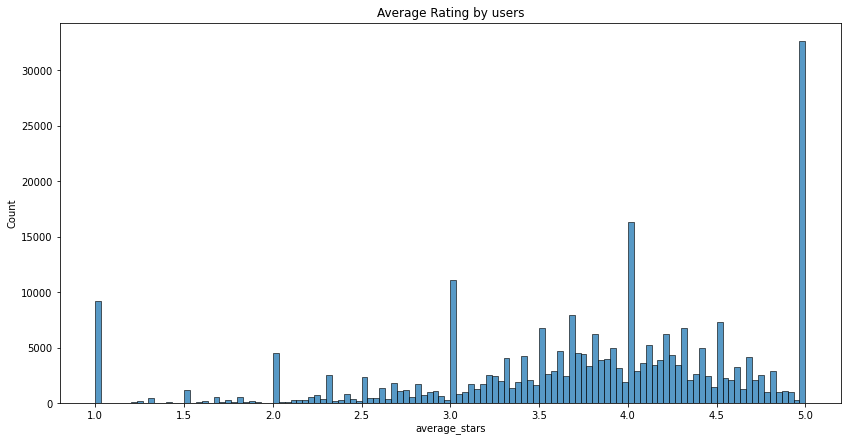

In [ ]:
fig=plt.figure(figsize=(14,7))
sns.histplot(user_df.average_stars)
plt.title('Average Rating by users');

##reviews.json EDA

In [ ]:
user_agg=review_df.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})

In [ ]:
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("          Top 10 Users in Yelp")
user_agg.head(10)

          Top 10 Users in Yelp


review_id                 date  ...  cool     stars
            count                  min  ...   sum      mean
user_id                                 ...                
215          1364  2010-11-02 18:35:26  ...   518  3.918622
370           898  2011-06-30 04:55:32  ...   744  3.440980
803           678  2011-02-09 08:26:50  ...   430  3.480826
179           644  2010-08-22 17:49:56  ...  4391  3.513975
258           535  2015-02-26 18:05:43  ...   343  3.545794
2128          500  2009-01-21 05:03:35  ...  1294  4.474000
34787         460  2007-07-11 04:10:59  ...  4028  4.045652
4518          386  2015-08-30 02:29:47  ...   337  4.095855
3953          379  2011-05-27 15:22:56  ...    21  4.934037
1164          342  2010-08-04 07:00:19  ...   141  3.105263

[10 rows x 7 columns]

In [ ]:
#Stalking the top user:
top_user_reviews=review_df[review_df['user_id']=='CxDOIDnH8gp9KXzpBHJYXw']
# Get locations of the places he/she has reviewed
top_user_locs=pd.merge(top_user_reviews,business_df,on='business_id')
# UNique list of dates from the user's reviews
date_list=list(top_user_locs['date'].unique())
#rearranging data to suit the format needed for folium
data=[]
for date in date_list:
    subset=top_user_locs[top_user_locs['date']==date]
    df=subset[['latitude','longitude','date']]
    data.append(subset[['latitude','longitude']].values.tolist())

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



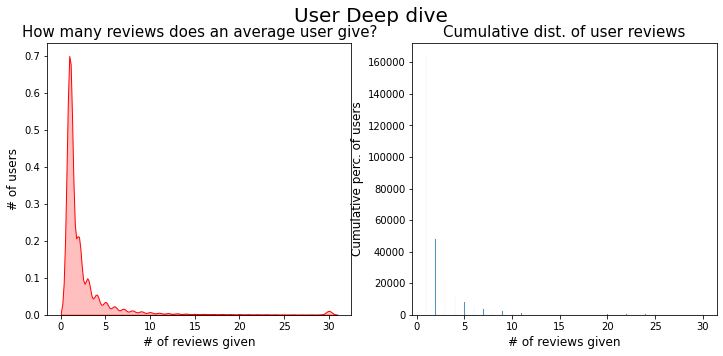

In [ ]:
# Cap max reviews to 30 for better visuals
user_agg[('review_id','count')].loc[user_agg[('review_id','count')]>30] = 30
plt.figure(figsize=(12,5))
plt.suptitle("User Deep dive",fontsize=20)
gridspec.GridSpec(1,2)
plt.subplot2grid((1,2),(0,0))
#Cumulative Distribution
ax=sns.kdeplot(user_agg[('review_id','count')],shade=True,color='r')
plt.title("How many reviews does an average user give?",fontsize=15)
plt.xlabel('# of reviews given', fontsize=12)
plt.ylabel('# of users', fontsize=12)

#Cumulative Distribution
plt.subplot2grid((1,2),(0,1))
sns.histplot(user_agg[('review_id','count')],
             kde_kws=dict(cumulative=True))
plt.title("Cumulative dist. of user reviews",fontsize=15)
plt.ylabel('Cumulative perc. of users', fontsize=12)
plt.xlabel('# of reviews given', fontsize=12)

plt.show()
# end_time=time.time()
# print("Took",end_time-start_time,"s")

# Training Recommendation System

## Setting up the Model

### Train-test split

In [ ]:
np.random.seed=43
train_indices, val_indices = train_test_split(range(review_df.shape[0]), train_size=0.8)
trdf = review_df.iloc[train_indices]
valdf = review_df.iloc[val_indices]
trdf.shape, valdf.shape

((660969, 9), (165243, 9))

We first set our hypeparameters, the size of the latent factors or the embeddings, up, and the amount of regularization. We will usually want to fit these hyper-parameters on the validation set.

In [ ]:
L = 50
REG = 5e-3

We first write a function to return us a bias layer:

In [ ]:
def create_bias(name, inp, n_in, reg):
    x = Embedding(n_in, 1, input_length=1, name=name, embeddings_regularizer=l2(reg))(inp)
    return Flatten(name=name+'_flat')(x)

and then another one to set us up an embedding layer...

In [ ]:
def embedding_input(name, n_in, n_out, reg):
    inp = Input(shape=(1,), dtype='int64', name=name)
    return inp, Embedding(n_in, n_out, input_length=1, name=name.split('_')[0]+'_factor', embeddings_regularizer=l2(reg))(inp)

This function also returns input layers which we will use as placeholders for our inputs, which are the user_id and business_id which are used as indexes into the embedding to get the latent factors for a particular user or business.

Now we define our embeddings and biases...

In [ ]:
user_input, uLmat = embedding_input('user_input', nusers, L, REG)
business_input, bLmat = embedding_input('business_input', nbusiness, L, REG)

The user_input is a placeholder for user_id and same for the business_input...

In [ ]:
user_input.shape, business_input.shape

(TensorShape([None, 1]), TensorShape([None, 1]))

In [ ]:
uLmat.shape, bLmat.shape

(TensorShape([None, 1, 50]), TensorShape([None, 1, 50]))

In [ ]:
user_bias = create_bias('user_bias', user_input, nusers, REG)
business_bias = create_bias('business_bias', business_input, nbusiness, REG)

In [ ]:
user_bias.shape, business_bias.shape

(TensorShape([None, 1]), TensorShape([None, 1]))

The embeddings are matrix multiplied together (dot producted together) to get the residual matrix, which is then flattened.

In [ ]:
residual = Dot(axes=2, name="residual")([uLmat, bLmat])

In [ ]:
residual.shape

TensorShape([None, 1, 1])

In [ ]:
residflat = Flatten(name="residual_flat")(residual)
residflat.shape

TensorShape([None, 1])

We add the flattened residual and the biases into the linear regression..

In [ ]:
regression = Add(name="regression")([user_bias, business_bias, residflat])

In [ ]:
regression.shape

TensorShape([None, 1])

..and then put a custom sigmoid activation to limit things between 0 and 5.5..we dont want our linear regression to go all over the place...

In [ ]:
review_df['stars'].describe()

count    826212.000000
mean          3.888124
std           1.296421
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: stars, dtype: float64

In [ ]:
def sigmoid_maker(low, high):
    def custom_sigmoid(x):
        return K.sigmoid(x)*(high - low) + low
    return custom_sigmoid

In [ ]:
cs = sigmoid_maker(0, 5.5)

In [ ]:
output = Activation(cs, name="Sigmoid_Range")(regression)

Now we set up the model with the user_ids and business_ids as input, and the output of the sigmoid as output..and ask Keras for a summary..compiling it with Adam and a learning rate of 0.001.

In [ ]:
model = Model([user_input, business_input], output)
model.compile(Adam(0.001), loss='mse')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 business_input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 user_factor (Embedding)        (None, 1, 50)        14057850    ['user_input[0][0]']             
                                                                                                  
 business_factor (Embedding)    (None, 1, 50)        304250      ['business_input[0][0]']         
                                                                                              

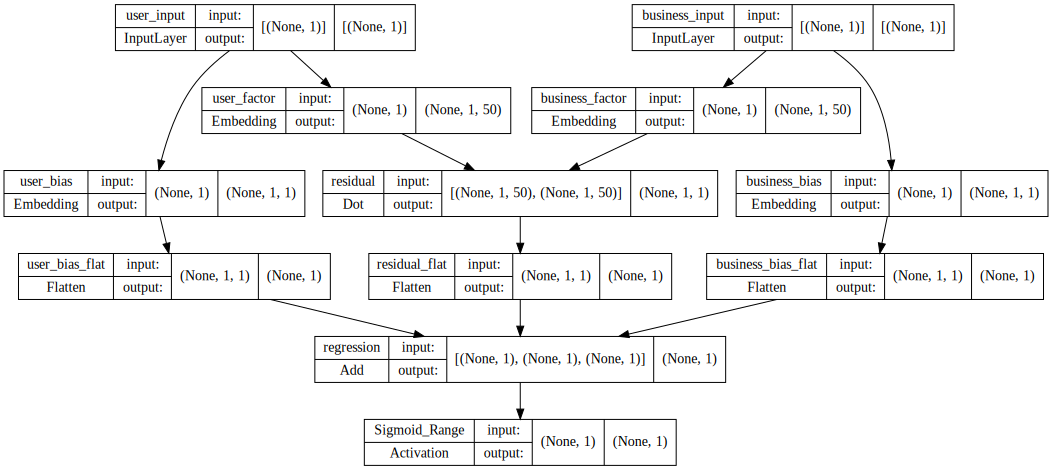

In [ ]:
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, dpi=72, rankdir='TB').create_svg())

## Training the model

We start slow with a learning rate of 0.001, then speed up to 0.01 and then slow back down so that we dont overshoot into having our validation loss climb back up..because then we would be overfitting...

In [ ]:
model.optimizer.lr=0.001
history1 = model.fit([trdf['user_id'], trdf['business_id']], trdf['stars'], batch_size=64, epochs=1, 
          validation_data=([valdf['user_id'], valdf['business_id']], valdf['stars']))

10328/10328 [==============================] - 151s 14ms/step - loss: 2.8043 - val_loss: 2.7078


In [ ]:
# save the trained model in .h5 format at model_path
model.save(model_path+'model1')

# save the model history in .npy format at model_path
np.save(model_path+'history1.npy', history1.history)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/DS1-Project/models/model1/assets


In [ ]:
model.optimizer.lr=0.01
history2 = model.fit([trdf['user_id'], trdf['business_id']], trdf['stars'], batch_size=64, epochs=1, 
          validation_data=([valdf['user_id'], valdf['business_id']], valdf['stars']))

10328/10328 [==============================] - 148s 14ms/step - loss: 3.0326 - val_loss: 3.0236


In [ ]:
# save the trained model in .h5 format at model_path
model.save(model_path+'model2')

# save the model history in .npy format at model_path
np.save(model_path+'history2.npy', history2.history)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/DS1-Project/models/model2/assets


In [ ]:
model.optimizer.lr=0.001
history3 = model.fit([trdf['user_id'], trdf['business_id']], trdf['stars'], batch_size=64, epochs=4, 
          validation_data=([valdf['user_id'], valdf['business_id']], valdf['stars']))

Epoch 1/4
10328/10328 [==============================] - 147s 14ms/step - loss: 2.7102 - val_loss: 2.7081
Epoch 2/4
10328/10328 [==============================] - 148s 14ms/step - loss: 2.7045 - val_loss: 2.7083
Epoch 3/4
10328/10328 [==============================] - 148s 14ms/step - loss: 2.7045 - val_loss: 2.7075
Epoch 4/4
10328/10328 [==============================] - 147s 14ms/step - loss: 2.7044 - val_loss: 2.7082


In [ ]:
# save the trained model in .h5 format at model_path
model.save(model_path+'model3')

# save the model history in .npy format at model_path
np.save(model_path+'history3.npy', history3.history)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/DS1-Project/models/model3/assets


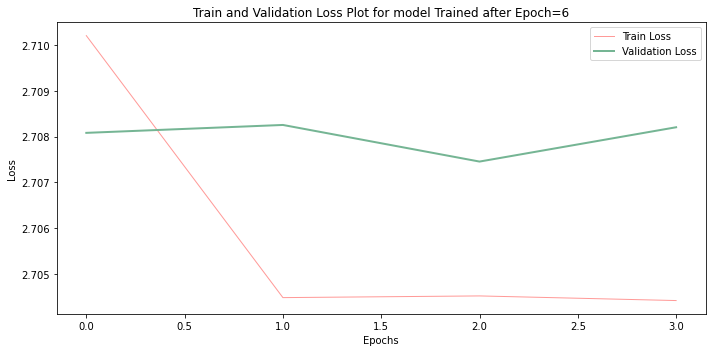

In [ ]:
# plot train and val loss as  a function of epochs
# your code here

# Plot the Loss of the model
plt.rcParams["figure.figsize"] = (10,5)
plt.title("Train and Validation Loss Plot for model Trained after Epoch=6")
plt.plot(history3.history['loss'], label='Train Loss', color='#FF9A98', linewidth=1)
plt.plot(history3.history['val_loss'],  label='Validation Loss', color='#75B594', linewidth=2)
plt.legend()

# Set the axes labels
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
model.optimizer.lr=0.001
history4 = model.fit([trdf['user_id'], trdf['business_id']], trdf['stars'], batch_size=64, epochs=2, 
          validation_data=([valdf['user_id'], valdf['business_id']], valdf['stars']))

Epoch 1/2
10328/10328 [==============================] - 147s 14ms/step - loss: 2.7044 - val_loss: 2.7083
Epoch 2/2
10328/10328 [==============================] - 148s 14ms/step - loss: 2.7045 - val_loss: 2.7076


In [ ]:
# save the trained model in .h5 format at model_path
model.save(model_path+'model4')

# save the model history in .npy format at model_path
np.save(model_path+'history4.npy', history4.history)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/DS1-Project/models/model4/assets


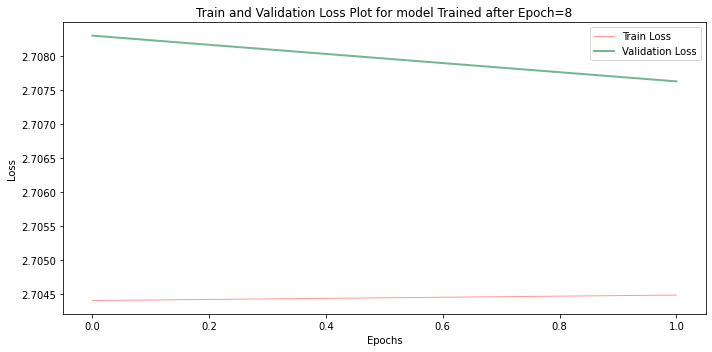

In [ ]:
# plot train and val loss as  a function of epochs
# your code here

# Plot the Loss of the model
plt.rcParams["figure.figsize"] = (10,5)
plt.title("Train and Validation Loss Plot for model Trained after Epoch=8")
plt.plot(history4.history['loss'], label='Train Loss', color='#FF9A98', linewidth=1)
plt.plot(history4.history['val_loss'],  label='Validation Loss', color='#75B594', linewidth=2)
plt.legend()

# Set the axes labels
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()
plt.legend()
plt.show()

## Making Predictions

In [1]:
# # Recreate the exact same model, including its weights and the optimizer
# model = tf.keras.models.load_model(model_path+'model4')

Predicting is easy, we just need to provide the user_id and business_id to our model in array form..

In [ ]:
review_df[(review_df['user_id']==3) & (review_df['business_id']==197)]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
3,KeyNH8Jj05BZGtqjgCFnTg,3,197,1,0,0,0,Had the worst experience there today when I tr...,2014-08-10 20:40:15


In [ ]:
model.predict([np.array([3]), np.array([197])])

array([[2.8195357]], dtype=float32)

In [ ]:
dfpreds = review_df[['user_id', 'business_id', 'stars']].copy()
dfpreds['predictions'] = model.predict([dfpreds['user_id'], dfpreds['business_id']]).ravel()

Text(0, 0.5, 'prediction')

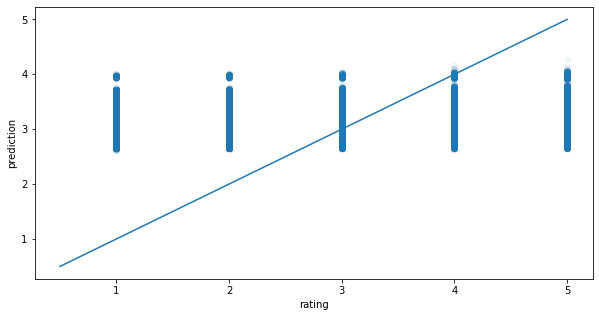

In [ ]:
plt.scatter(dfpreds['stars'], dfpreds['predictions'], alpha=0.05)
plt.plot([0.5,5],[0.5,5])
plt.xlabel("rating")
plt.ylabel("prediction")

Lets round off the predicted ratings to the nearest 0.5 and compute a "confusion matrix" to see how well or badly we did...

In [ ]:
ct = pd.crosstab(dfpreds.stars.astype('category'), 
                 dfpreds.predictions.apply(lambda x: round(x*2)/2).astype('category'))
ct

predictions,2.5,3.0,3.5,4.0,4.5
stars,,,,,
1,11418,59817,2634,195,0
2,4760,57361,4299,254,0
3,3923,87940,8746,681,0
4,5184,190824,21464,2315,0
5,5988,310662,39328,8418,1


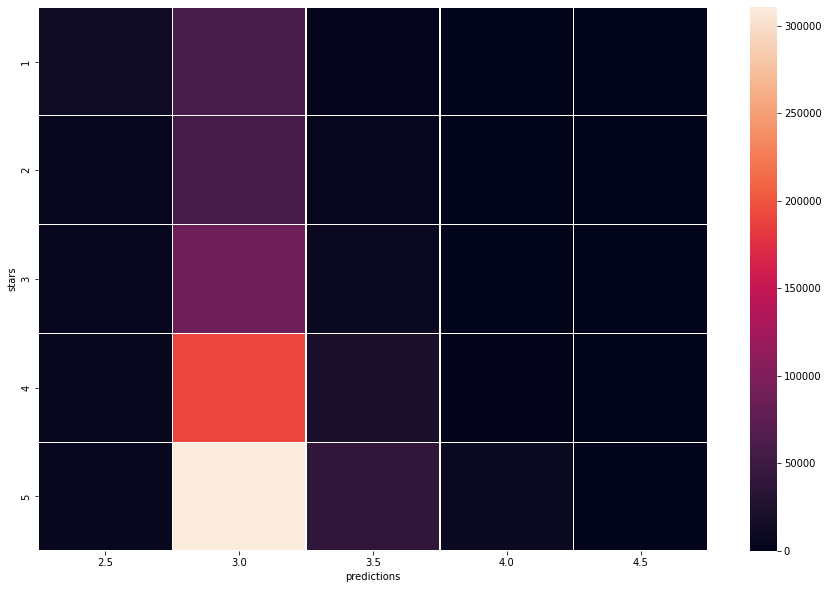

In [ ]:
# Heatmap of confusion matrix
plt.figure(figsize = (15,10))
sns.heatmap(ct, linewidths=0.1)

# Location Based Recommendation For New Users
To Resolve Cold-Start Problem

## Based on the City Entered by the User

In [ ]:
# Based on the city entered by the user
city = 'Portland'

In [ ]:
# Finding the Top 5 Restaurants sorted by 'stars' and 'review_count' in that city
num_restaurants = 5
tmp = business_df[business_df['city'] == city].sort_values(by=['stars', 'review_count'], ascending=False)[:num_restaurants]

In [ ]:
# px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig = px.scatter_mapbox(tmp, lat="latitude", lon="longitude", color="stars", size='review_count',
                  hover_data= ['name', 'address'], size_max=30, zoom=3, width=1200, height=800)
fig.update_layout(title = f"Top {num_restaurants} Restaurants by 'stars' and 'review_count' in {city}", title_x=0.5)
fig.show()

## Based on the Coordinates of the User

In [ ]:
# User coordinates
user_coords = np.array([[45.5231, -122.6813]])

In [ ]:
# Converting User coordinates to dataframe
user_coords_df = pd.DataFrame(user_coords, columns=['latitude', 'longitude'])
user_coords_df

,latitude,longitude
0,45.5231,-122.6813


In [ ]:
# Taking only the lat and long coordinates of each business
tmp = business_df[['latitude', 'longitude']]

In [ ]:
# Finding the 5 Nearest Restaurants to the User
num_restaurants = 5
nbrs = NearestNeighbors(n_neighbors=num_restaurants).fit(tmp)
distances, indices = nbrs.kneighbors(user_coords_df)

In [ ]:
fig = px.scatter_mapbox(business_df.iloc[list(indices.squeeze()), :], lat="latitude", lon="longitude", color="stars", size='review_count',
                  hover_data= ['name', 'address'], size_max=30, zoom=3, width=1200, height=800)
fig.add_scattermapbox(lat=user_coords_df["latitude"], lon=user_coords_df["longitude"], marker = {'size': 20, 'symbol': ["harbor"]})
fig.update_layout(title = f'{num_restaurants} Nearest Restaurants to the User', title_x=0.5)
fig.show()

# Making Recomendations to Existing Users

In [140]:
# Considering a random user_id
USERID = 370
auser = user_names[USERID]
print(f'Name of the User: {auser}')

Name of the User: Kenneth


In [141]:

dfuser370 = review_df[(review_df['user_id']==USERID)].sort_values('stars', ascending=False)
dfuser370.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
814150,LISZZwj_MqyhnA9gV66nng,370,5923,5,3,0,0,"Decided to try their soup of the day, that's w...",2012-12-19 15:00:22
242656,2G5VJ1FsMsw_tiK2bOleXA,370,1938,5,8,6,9,"Wow. Totally floored that on westside, to get...",2015-11-07 13:00:10
18849,WlmS86X5yX-B8NF5zPRA-g,370,551,5,1,0,1,"tonight, the ""macaron du jour', was the lychee...",2012-02-11 05:17:36
536115,ZNZbz_A1jVsv35DdDFNmWw,370,3857,5,1,0,1,It's amazing how smooth and clear the broth lo...,2017-11-06 06:35:42
464894,dDYOR9W_Uo2_LoT3A3sELg,370,3319,5,1,0,0,"What a great resto for this area, should take ...",2012-08-09 06:58:45


In [142]:
# Finding the restaurants the user has not visited
restaurants_not_visited = list(set(review_df['business_id']) - set(dfuser370['business_id']))
len(restaurants_not_visited)

5296

In [143]:
# Predicting for the restaurants the user has not visited
predictions = model.predict([np.array([USERID]*len(restaurants_not_visited)), np.array(restaurants_not_visited)]).ravel()
predictions

array([2.9366102, 2.864456 , 2.9246657, ..., 2.872519 , 3.0222402,
       2.8806462], dtype=float32)

In [144]:
# Sorting on the prediction ratings
dfuser370preds = pd.DataFrame(dict(
    business_id = restaurants_not_visited,
    predictions = predictions
))
dfuser370preds['business_name'] = dfuser370preds['business_id'].apply(lambda x: business_names[x])
dfuser370preds['user_id'] = USERID
dfuser370preds.sort_values('predictions', ascending=False)

,business_id,predictions,business_name,user_id
1424,1629,4.074830,Screen Door,370
923,1060,4.045069,Powell's City of Books,370
4089,4715,3.823808,Mother’s Bistro & Bar,370
5109,5867,3.791977,Pine State Biscuits,370
3796,4374,3.778804,Pip's Original Doughnuts & Chai,370
...,...,...,...,...
3632,4183,2.819516,Dr. Jack's at the Rose Quarter,370
17,18,2.817868,McDonald's,370
1905,2181,2.814953,Burger King,370
3013,3460,2.796125,Buffalo Wild Wings,370


In [145]:
# Recommending 5 Unvisited Restaurants to the Existing User Based on His/Her History
num_restaurants = 5
unvisited_businessids = list(dfuser370preds.sort_values('predictions', ascending=False)['business_id'].values[:num_restaurants])
fig = px.scatter_mapbox(business_df[business_df['business_id'].isin(unvisited_businessids)], lat="latitude", lon="longitude", color="stars", size='review_count',
                  hover_data= ['name', 'address'], size_max=30, zoom=3, width=1200, height=800)
# fig.add_scattermapbox(lat=user_coords_df["latitude"], lon=user_coords_df["longitude"], marker = {'size': 20, 'symbol': ["harbor"]})
fig.update_layout(title = f'Recommending {num_restaurants} Unvisited Restaurants to {auser} (an Existing User) Based on His/Her History', title_x=0.5)
fig.show()

# Cosine similarity

This is how to answer the question: "If you like this you might like that".

In [ ]:
# Get business embeddings
get_business_emb = Model(business_input, bLmat)
business_embbeddings = np.squeeze(get_business_emb.predict([np.array(list(businessid2idx.values()))]))

In [ ]:
# Get user embeddings
get_user_emb = Model(user_input, uLmat)
user_embbeddings = np.squeeze(get_user_emb.predict([np.array(list(userid2idx.values()))]))

In [167]:
# # Saving business_input as pkl
# # a_file = open(file_path+"business_input.pkl", "wb")
# # pickle.dump(business_input, a_file)
# business_input.save(file_path+"business_input")

# # Saving bLmat as pkl
# a_file = open(file_path+"bLmat.pkl", "wb")
# pickle.dump(bLmat, a_file)

# # Saving business_embbeddings as pkl
# a_file = open(file_path+"business_embbeddings.pkl", "wb")
# pickle.dump(business_embbeddings, a_file)

# # Saving user_input as pkl
# # a_file = open(file_path+"user_input.pkl", "wb")
# # pickle.dump(user_input, a_file)
# user_input.save(file_path+"user_input")

# # Saving uLmat as pkl
# a_file = open(file_path+"uLmat.pkl", "wb")
# pickle.dump(uLmat, a_file)

# # Saving user_embbeddings as pkl
# a_file = open(file_path+"user_embbeddings.pkl", "wb")
# pickle.dump(user_embbeddings, a_file)

In [ ]:
business_embbeddings.shape

(6085, 50)

In [ ]:
user_embbeddings.shape

(281157, 50)

## Recommendations When a User Searches for a Particular Restaurant

In [146]:
# User searches for 'Mother’s Bistro & Bar'
ABUSINESSID = 4715
abusiness = business_names[ABUSINESSID]
print(f'Name of the Restaurant: {abusiness}')

Name of the Restaurant: Mother’s Bistro & Bar


In [147]:
embeds_dict = dict(zip(list(businessid2idx.values()), business_embbeddings))

In [148]:
# Implementing cosine similarity
bsim4715 = pd.DataFrame(dict(
    sim = cosine_similarity(embeds_dict[ABUSINESSID], [embeds_dict[x] for x in list(businessid2idx.values())]).numpy(),
    business_id = list(businessid2idx.values()),
    business_name = [business_names[x] for x in list(businessid2idx.values())],
))

10 most similar restaurants to 'Mother’s Bistro & Bar'. This is same for all users.

In [149]:
bsim4715.sort_values('sim', ascending=False).head(10)

,sim,business_id,business_name
5635,0.654948,5635,Pho Sen
1602,0.630876,1602,Casa Vacca Italian
2483,0.618630,2483,Jack in the Box
324,0.609881,324,Van Hanh Restaurant-Vegan & Vegetarian
1330,0.600801,1330,PieVino
1947,0.597105,1947,Aperture Coffee Bar
3942,0.586962,3942,Mariscos Tinto del Mar
1445,0.586799,1445,Popeyes Louisiana Kitchen
2586,0.586422,2586,Uncle Mings Kitchen
895,0.585913,895,Slice of Chicago


In [150]:
# Recommending 5 Similar Restaurants to a Particular Restaurant
num_restaurants = 5
unvisited_businessids = list(bsim4715.sort_values('sim', ascending=False)['business_id'].values[:num_restaurants])
unvisited_businessids.append(ABUSINESSID)
fig = px.scatter_mapbox(business_df[business_df['business_id'].isin(unvisited_businessids)], lat="latitude", lon="longitude", color="stars", size='review_count',
                  hover_data= ['name', 'address'], size_max=30, zoom=3, width=1200, height=800)
# fig.add_scattermapbox(lat=user_coords_df["latitude"], lon=user_coords_df["longitude"], marker = {'size': 20, 'symbol': ["harbor"]})
fig.update_layout(title = f'Recommending {num_restaurants} Similar Restaurants to {abusiness}', title_x=0.5)
fig.show()

### Customizing to the User..
Now, lets see what user_id 11174 predicts for the restaurants, ordered by similarity to business_id 4715.

In [151]:
USERID = 11174
ABUSINESSID = 4715

auser = user_names[USERID]
abusiness = business_names[ABUSINESSID]

print(f'Name of the User: {auser}')
print(f'Name of the Restaurant: {abusiness}')

Name of the User: Joy
Name of the Restaurant: Mother’s Bistro & Bar


In [152]:
# Finding the predictions for the user for similar restaurants to a particular restaurant
predictions3 = pd.Series(model.predict([np.array([USERID]*len(bsim4715)), bsim4715['business_id']]).ravel(), index = bsim4715.index, name='predictions')
predictions3

0       2.806144
1       2.848898
2       2.733777
3       2.794152
4       2.802672
          ...   
6080    2.849550
6081    2.764085
6082    2.741855
6083    2.892262
6084    2.750000
Name: predictions, Length: 6085, dtype: float32

In [153]:
merged = bsim4715.merge(predictions3, left_index=True, right_index=True)
merged

,sim,business_id,business_name,predictions
0,0.581575,0,Flying Elephants at PDX,2.806144
1,-0.440361,1,Bob Likes Thai Food,2.848898
2,0.031604,2,Cleary's Restaurant & Spirits,2.733777
3,-0.006532,3,Cafe Yumm!,2.794152
4,-0.017202,4,Los Potrillos Mexican Restaurant & Bar,2.802672
...,...,...,...,...
6080,-0.021650,6080,Thai Garden,2.849550
6081,0.019427,6081,McMenamins Barley Mill Pub,2.764085
6082,0.006298,6082,Elysian Coffee,2.741855
6083,-0.007467,6083,Chart House,2.892262


So now we choose a similarity neighborhood (10) and customize by score user_id = 11174 is predicted to give it.

In [154]:
tmp = merged.sort_values('sim', ascending=False).head(10).sort_values('predictions', ascending=False)
tmp

,sim,business_id,business_name,predictions
324,0.609881,324,Van Hanh Restaurant-Vegan & Vegetarian,2.882817
1330,0.600801,1330,PieVino,2.879996
1947,0.597105,1947,Aperture Coffee Bar,2.818964
1602,0.630876,1602,Casa Vacca Italian,2.798729
5635,0.654948,5635,Pho Sen,2.795367
1445,0.586799,1445,Popeyes Louisiana Kitchen,2.772511
2586,0.586422,2586,Uncle Mings Kitchen,2.759110
895,0.585913,895,Slice of Chicago,2.750364
3942,0.586962,3942,Mariscos Tinto del Mar,2.750000
2483,0.618630,2483,Jack in the Box,2.749453


In [155]:
# Recommending 5 Similar Restaurants to the Existing User When He/She Searches For a Restaurant
num_restaurants = 5
unvisited_businessids = list(tmp['business_id'].values[:num_restaurants])
unvisited_businessids.append(ABUSINESSID)
fig = px.scatter_mapbox(business_df[business_df['business_id'].isin(unvisited_businessids)], lat="latitude", lon="longitude", color="stars", size='review_count',
                  hover_data= ['name', 'address'], size_max=30, zoom=3, width=1200, height=800)
# fig.add_scattermapbox(lat=user_coords_df["latitude"], lon=user_coords_df["longitude"], marker = {'size': 20, 'symbol': ["harbor"]})
fig.update_layout(title = f'Recommending {num_restaurants} Similar Restaurants to {auser} (an Existing User) When He/She Searches For {abusiness}', title_x=0.5)
fig.show()

# Recommendations Based on User Similarities

In [156]:
review_df[review_df['user_id']==1174].sort_values('stars', ascending=False).head(2)['business_id'].to_list()

[1925, 4364]

In [157]:
user_embeds_dict = dict(zip(list(userid2idx.values()), user_embbeddings))

In [158]:
# Considering a random user
USERID = 11174
auser = user_names[USERID]

print(f'Name of the User: {auser}')

Name of the User: Joy


In [159]:
# Calculating cosine similarity of that user with all the users
usim11174 = pd.DataFrame(dict(
    sim = cosine_similarity(user_embeds_dict[USERID], [user_embeds_dict[x] for x in list(userid2idx.values())]).numpy(),
    user_id = list(userid2idx.values()),
    user_name = [user_names[x] for x in list(userid2idx.values())]
))

In [160]:
# Users similar to user_id 11174
usim11174.sort_values('sim', ascending=False).head(10)

,sim,user_id,user_name
11511,0.994998,11511,Lisa
59191,0.993272,59191,Sue
78273,0.990770,78273,Anastasia
144285,0.989638,144285,Jena
161905,0.988093,161905,Lele
59966,0.987870,59966,Jun
925,0.987840,925,Amber
135104,0.987787,135104,Golden
136435,0.987772,136435,Stefania
266602,0.987732,266602,Arianna


We will take Top 3 users similar to user_id = 11174 and find out 2 highest rated restaurants by each of these 3 users and recommend this list of 6 restaurants to user_id = 11174

In [161]:
recommend_businessids = []

top3_similar_users = list(usim11174.sort_values('sim', ascending=False).head(3)['user_id'])
top3_similar_users_names = list(usim11174.sort_values('sim', ascending=False).head(3)['user_name'])

for user in top3_similar_users:
  tmp = review_df[review_df['user_id']==user].sort_values('stars', ascending=False).head(2)['business_id'].to_list()
  for t in tmp:
    recommend_businessids.append(t)

recommend_businessids

[3767, 4256, 931, 931, 1647, 3315]

In [162]:
recommend_businessids = list(set(recommend_businessids))
recommend_businessids

[4256, 931, 1647, 3315, 3767]

In [163]:
# Recommending 5 Restaurants to the Existing User Based on the Choices of Similar Users

fig = px.scatter_mapbox(business_df[business_df['business_id'].isin(recommend_businessids)], lat="latitude", lon="longitude", color="stars", size='review_count',
                  hover_data= ['name', 'address'], size_max=30, zoom=3, width=1200, height=800)
# fig.add_scattermapbox(lat=user_coords_df["latitude"], lon=user_coords_df["longitude"], marker = {'size': 20, 'symbol': ["harbor"]})
fig.update_layout(title = f'Recommending 5 Restaurants to {auser} (an Existing User) Based on the Choices of {top3_similar_users_names} Who are Similar Users to {auser}', title_x=0.5)
fig.show()

# Social Network Based Recommendation Exploration

## Yelp Users Data - Clustering 


> 1. Read Data
> 2. Add and Drop Columns
> 3. Initial Data Analysis (IDA)
> 4. Scale Data to prep for PCA, & for comparison
> 5. Compare Covariance and Correlation values for data
> 6. Dimansionality Reduction (using PCA)
> 7. KMeans Clustering on Data

In [ ]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline
inline_rc = dict(mpl.rcParams)

### 1. Read Data

In [ ]:
# We only use the first 100,000 data in this assignment
users = []
with open(user_json_path) as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
        if i+1 >= 100000:
            break
df = pd.DataFrame(users)
df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1220,2005-03-14 20:26:35,15038,10030,11291,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,190,361,147,1212,5691,2541,2541,815,323
1,dIIKEfOgo0KqUfGQvGikPg,Gabi,2136,2007-08-10 19:01:51,21272,10289,18046,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2...","XPzYf9_mwG2eXYP2BAGSTA, 2LooM5dcIk2o01nftYdPIg...",1025,...,87,94,232,96,1187,3293,2205,2205,472,294
2,D6ErcUnFALnCQN4b1W_TlA,Jason,119,2007-02-07 15:47:53,188,128,130,"2010,2011","GfB6sC4NJQvSI2ewbQrDNA, jhZtzZNNZJOU2YSZ6jPlXQ...",16,...,1,3,0,0,5,20,31,31,3,1
3,JnPIjvC0cmooNDfsa9BmXg,Kat,987,2009-02-09 16:14:29,7234,4722,4035,"2009,2010,2011,2012,2013,2014","HQZPQhKMwRAyS6BCselVWQ, kP2U1s_sjQfHO9grxiyDTA...",420,...,129,93,219,90,1120,4510,1566,1566,391,326
4,37Hc8hr3cw0iHLoPzLK6Ow,Christine,495,2008-03-03 04:57:05,1577,727,1124,"2009,2010,2011","-Q88pZUcrfN0BLBDp-bkAQ, etPn4Pv1Gc4cRZjRgB_BOw...",47,...,19,32,16,15,77,131,310,310,98,44


In [ ]:
# Measures of central tendency for given data
df.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,94.507630,223.875900,99.665410,134.012780,8.005220,3.82643,10.287070,1.649460,1.032950,0.849000,0.46134,7.525630,16.986740,15.984520,15.984520,6.213780,5.049220
std,231.431518,1529.536712,988.169873,1318.282513,58.138128,0.64985,141.947943,19.018901,27.379356,14.978105,11.24133,69.210101,205.918427,183.656621,183.656621,62.744102,101.426365
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,9.000000,1.000000,2.000000,0.000000,3.51000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,32.000000,7.000000,8.000000,1.000000,3.87000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,84.000000,108.000000,30.000000,34.000000,4.000000,4.22000,1.000000,1.000000,0.000000,0.000000,0.00000,2.000000,3.000000,2.000000,2.000000,1.000000,0.000000
max,14691.000000,182600.000000,166330.000000,175463.000000,12116.000000,5.00000,25019.000000,3575.000000,5662.000000,2487.000000,2261.00000,5241.000000,17426.000000,24495.000000,24495.000000,7195.000000,13058.000000


In [ ]:
# An overarching look at the missing data
# msno.matrix(df)

#### No significant missing Data - thats good!

### 2. Preprocessing
1. Drop columns not required
2. Make new colums from existing data 

**2.1 Drop columns name & user_id**
###### Could have dropped yelping_since and elite as well, but saved for later use

In [ ]:
# Delete multiple columns from the df
df = df.drop(["user_id", "name"], axis=1)
# df.head()

#### 2.2 Add columns 
1. Column for number of friends
2. Column to keep count of number of years of elite status
3. Column to keep user since YR, and user since YRMO

2.2.1 Column for friend count

In [ ]:
# Make column friend_count = number of friends
friend_count = [0 for _ in range(df.shape[0])]
for i in range(df.shape[0]):
    friend_count[i] = len(df.loc[i, "friends"].split(","))
    
friend_count = pd.DataFrame(friend_count)
# print(friend_count)

In [ ]:
# Add column friend count column to main db
df['friend_count'] = friend_count

# Drop column friends as not used again
df = df.drop(["friends"], axis=1)
df.head()

,review_count,yelping_since,useful,funny,cool,elite,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friend_count
0,1220,2005-03-14 20:26:35,15038,10030,11291,"2006,2007,2008,2009,2010,2011,2012,2013,2014",1357,3.85,1710,163,190,361,147,1212,5691,2541,2541,815,323,5813
1,2136,2007-08-10 19:01:51,21272,10289,18046,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2...",1025,4.09,1632,87,94,232,96,1187,3293,2205,2205,472,294,6296
2,119,2007-02-07 15:47:53,188,128,130,"2010,2011",16,3.76,22,1,3,0,0,5,20,31,31,3,1,835
3,987,2009-02-09 16:14:29,7234,4722,4035,"2009,2010,2011,2012,2013,2014",420,3.77,1180,129,93,219,90,1120,4510,1566,1566,391,326,1452
4,495,2008-03-03 04:57:05,1577,727,1124,"2009,2010,2011",47,3.72,248,19,32,16,15,77,131,310,310,98,44,532


2.2.2 Make column Elite Status Count (num of years), add it to db

In [ ]:
elite_count = [0 for _ in range(df.shape[0])]
for i in range(df.shape[0]):
    elite_count[i] = len(df.loc[i, "elite"].split(","))
    
elite_count = pd.DataFrame(elite_count)
# print(elite_count)
df['elite_count'] = elite_count  # Add column to df
df = df.drop(["elite"], axis=1) # Drop elite
df.head()

,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friend_count,elite_count
0,1220,2005-03-14 20:26:35,15038,10030,11291,1357,3.85,1710,163,190,361,147,1212,5691,2541,2541,815,323,5813,9
1,2136,2007-08-10 19:01:51,21272,10289,18046,1025,4.09,1632,87,94,232,96,1187,3293,2205,2205,472,294,6296,15
2,119,2007-02-07 15:47:53,188,128,130,16,3.76,22,1,3,0,0,5,20,31,31,3,1,835,2
3,987,2009-02-09 16:14:29,7234,4722,4035,420,3.77,1180,129,93,219,90,1120,4510,1566,1566,391,326,1452,6
4,495,2008-03-03 04:57:05,1577,727,1124,47,3.72,248,19,32,16,15,77,131,310,310,98,44,532,3


2.2.3 From yelping_since make columns for year and yearmonth (YRMO)

In [ ]:
df['yelping_since'] = pd.to_datetime(df['yelping_since'])

df['yelp_since_YRMO'] = df['yelping_since'].map(lambda x: 100*x.year + x.month)
df['yelp_since_year'] = df['yelping_since'].dt.year

df.head()

,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,...,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friend_count,elite_count,yelp_since_YRMO,yelp_since_year
0,1220,2005-03-14 20:26:35,15038,10030,11291,1357,3.85,1710,163,190,...,1212,5691,2541,2541,815,323,5813,9,200503,2005
1,2136,2007-08-10 19:01:51,21272,10289,18046,1025,4.09,1632,87,94,...,1187,3293,2205,2205,472,294,6296,15,200708,2007
2,119,2007-02-07 15:47:53,188,128,130,16,3.76,22,1,3,...,5,20,31,31,3,1,835,2,200702,2007
3,987,2009-02-09 16:14:29,7234,4722,4035,420,3.77,1180,129,93,...,1120,4510,1566,1566,391,326,1452,6,200902,2009
4,495,2008-03-03 04:57:05,1577,727,1124,47,3.72,248,19,32,...,77,131,310,310,98,44,532,3,200803,2008


In [ ]:
# Column to store whether compliment has been tagged
tagged_compliment = [0 for _ in range(df.shape[0])]
for i in range(df.shape[0]):
    if sum(df.iloc[i, 7:18].values) > 0:
        tagged_compliment[i] = 1
        
tagged_compliment = pd.DataFrame(tagged_compliment)
df['tagged_compliment'] = tagged_compliment

### 3 

> 1. Time series analysis
> 2. Avg Stars Rating analysis
> 3. Feature Distributions

3.1 Time Series analysis of User Data

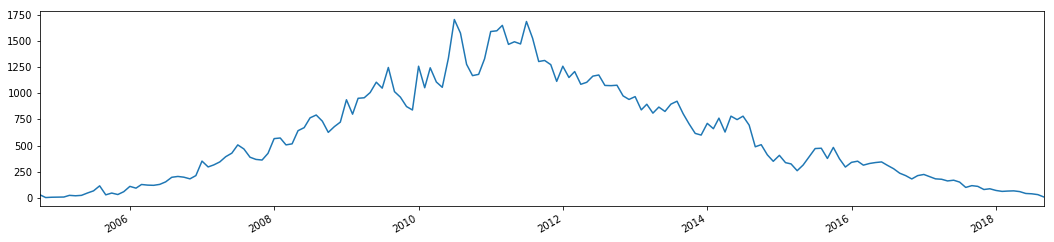

In [ ]:
# Plot count vs yearmonth, to see the distribution
plt.figure(figsize=(18,4))
yrmo = pd.to_datetime(df['yelp_since_YRMO'], format='%Y%m')
yrmo = pd.DataFrame(yrmo)
yrmo.yelp_since_YRMO.value_counts().plot(kind='line')

Insight:
> For the given data max ids are form years 2010 to 2016

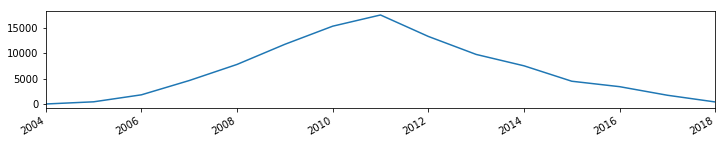

In [ ]:
plt.figure(figsize=(12,2))
year = pd.to_datetime(df['yelp_since_year'], format='%Y')
year = pd.DataFrame(year)
year.yelp_since_year.value_counts().plot(kind='line')

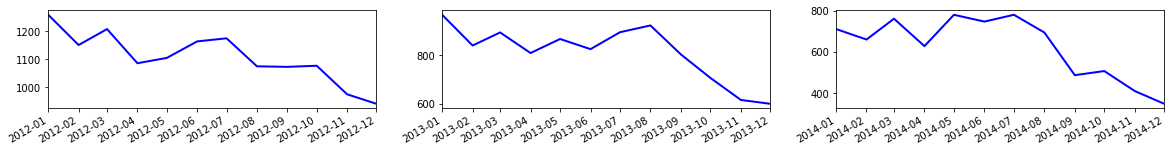

In [ ]:
# Time Period 201201-201212 | 201301-201312 | 201401-201412
plt.figure(figsize=(20,2))
period_12 = yrmo[yrmo.yelp_since_YRMO >= pd.to_datetime(201201, format='%Y%m')]
period_12 = period_12[period_12.yelp_since_YRMO <= pd.to_datetime(201212, format='%Y%m')]
period_12 = pd.to_datetime(period_12.yelp_since_YRMO, format='%Y%m')

period_13 = yrmo[yrmo.yelp_since_YRMO >= pd.to_datetime(201301, format='%Y%m')]
period_13 = period_13[period_13.yelp_since_YRMO <= pd.to_datetime(201312, format='%Y%m')]
period_13 = pd.to_datetime(period_13.yelp_since_YRMO, format='%Y%m')

period_14 = yrmo[yrmo.yelp_since_YRMO >= pd.to_datetime(201401, format='%Y%m')]
period_14 = period_14[period_14.yelp_since_YRMO <= pd.to_datetime(201412, format='%Y%m')]
period_14 = pd.to_datetime(period_14.yelp_since_YRMO, format='%Y%m')

plt.subplot(131)
period_12.value_counts().plot(kind='line', linewidth=2, color='b')
plt.subplot(132)
period_13.value_counts().plot(kind='line', linewidth=2, color='b')
plt.subplot(133)
period_14.value_counts().plot(kind='line', linewidth=2, color='b')
plt.show()

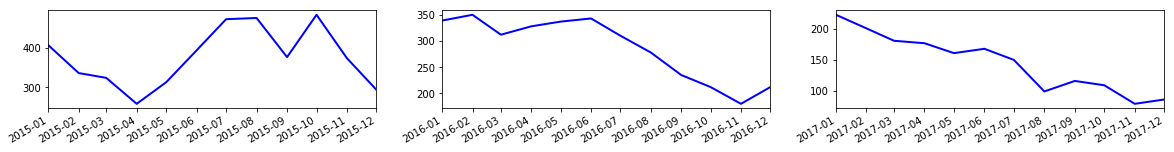

In [ ]:
# Time Period 201501-201512 | 201601-201612 | 201701-201712
plt.figure(figsize=(20,2))
period_15 = yrmo[yrmo.yelp_since_YRMO >= pd.to_datetime(201501, format='%Y%m')]
period_15 = period_15[period_15.yelp_since_YRMO <= pd.to_datetime(201512, format='%Y%m')]
period_15 = pd.to_datetime(period_15.yelp_since_YRMO, format='%Y%m')

period_16 = yrmo[yrmo.yelp_since_YRMO >= pd.to_datetime(201601, format='%Y%m')]
period_16 = period_16[period_16.yelp_since_YRMO <= pd.to_datetime(201612, format='%Y%m')]
period_16 = pd.to_datetime(period_16.yelp_since_YRMO, format='%Y%m')

period_17 = yrmo[yrmo.yelp_since_YRMO >= pd.to_datetime(201701, format='%Y%m')]
period_17 = period_17[period_17.yelp_since_YRMO <= pd.to_datetime(201712, format='%Y%m')]
period_17 = pd.to_datetime(period_17.yelp_since_YRMO, format='%Y%m')

plt.subplot(131)
period_15.value_counts().plot(kind='line', linewidth=2, color='b')
plt.subplot(132)
period_16.value_counts().plot(kind='line', linewidth=2, color='b')
plt.subplot(133)
period_17.value_counts().plot(kind='line', linewidth=2, color='b')
plt.show()

Insights:
> 1. For majority of the years, we see max ids, or max usage in months May - August
> 2. Winter months, starting October usually see decline in new user or user usage
> 3. Less data (or users) available for 2016 and 2017, though years show similar peaks, the value of maximas and minimas are low comparitively

In [ ]:
# Drop yelping_since column from df as not used again, and we already store lower granularity data in year & yrmo
df = df.drop(["yelping_since"], axis=1)

3.2 Avg Stars rating Analysis

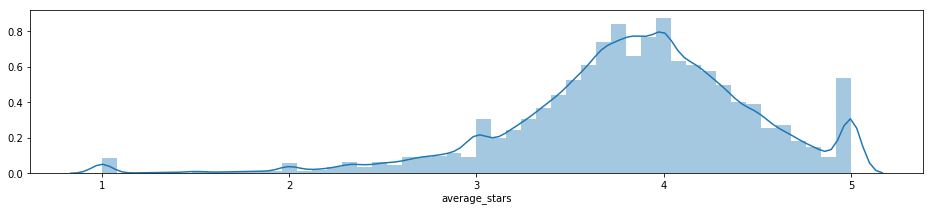

In [ ]:
plt.figure(figsize=(16,3))
sns.distplot(df.average_stars)

In [ ]:
raters_below_3 = len(df.loc[df.average_stars <= 3])
print("Users who rate <= 3 Avg Stars: {:0.02%}".format(raters_below_3/df.shape[0]))

Users who rate <= 3 Avg Stars: 9.71%


> * Ideal compariosn would be 3 way split, b/w Low-Med-High, but data is skewed towards people with high avg rating
> * value = 4 chosen as cut off, beacuse count of values with avg rating <= 3 is only ~12%

In [ ]:
low_raters = len(df.loc[df.average_stars < 4])
high_raters = len(df.loc[df.average_stars >= 4])
print("Low Raters, <4 Avg Stars: {:0.02%}".format(low_raters/df.shape[0]))
print("High Raters >=4 Avg Stars: {:0.02%}".format(high_raters/df.shape[0]))

Low Raters, <4 Avg Stars: 58.15%
High Raters >=4 Avg Stars: 41.85%


Insights:
> 1.  Majority of people, >85% rate (or have avg stars) yelp listings above 3 stars
     *  The above could be deciphered in many ways, like data skewed towards higher avg raters,or
     *  Most of the people rate things higher on yelp, or
     *  People tend to only rate when they find something good (weak hypothesis)
> 2.  Very high raters (>4 avg ratings) are maginally lower ~42%
    

In [ ]:
# Make a column raters, which is 1 for high raters (>=4 avg stars), and 0 for the rest (<4)

raters = [0 for _ in range(df.shape[0])]
for i in range(df.shape[0]):
    if df.loc[i,"average_stars"] >= 4:
        raters[i] = 1
#     elif float(3) <= df.loc[i,"average_stars"] < float(4):
#         rating[i] = "M"
#     else:
#         raters[i] = "H"
# Add column to main df
df['raters'] = raters

3.3 Distributions and corresponding analyses

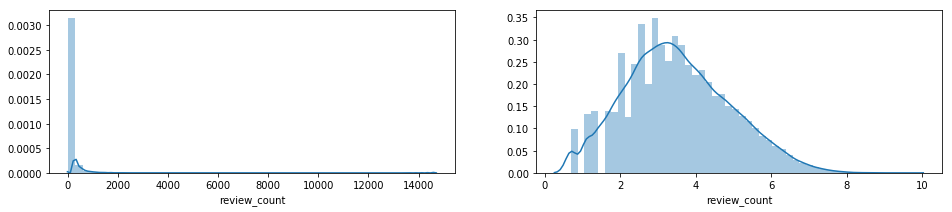

In [ ]:
plt.figure(figsize=(16,3))
plt.subplot(121)
sns.distplot(df.review_count)

# Taking a Normal Distribution as review_count heavily skewed
plt.subplot(122)
sns.distplot(df.review_count.apply(np.log1p))

> 1. Majority of people of have written lower number of reviews
> 2. High number of reviews are very low <0.05% of populations/users (max reviewer has 12,390 reviews!)
> 3. From the people who actually review, high majority lie b/w 2-4 reviews

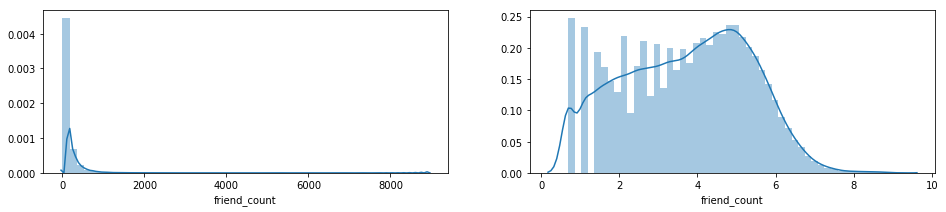

In [ ]:
plt.figure(figsize=(16,3))
plt.subplot(121)
sns.distplot(df.friend_count)

# Taking a Normal Distribution as friend_count heavily skewed
plt.subplot(122)
sns.distplot(df.friend_count.apply(np.log1p))

> 1. Majority people don't have yelp friends (or haven't connected to to friends on yelp)
> 2. Those that have freinds on yelp, have usually between 2-5 freinds

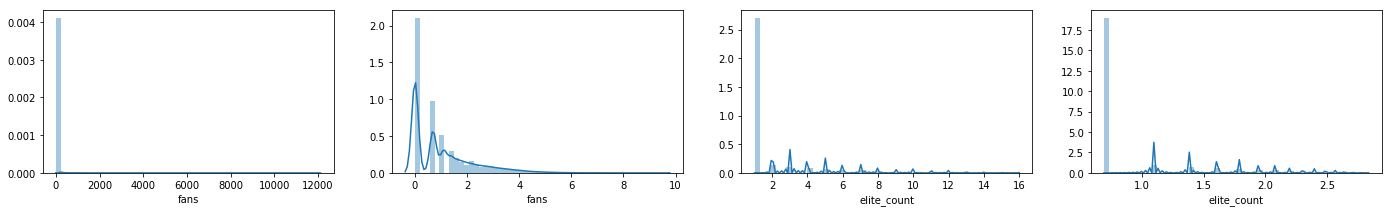

In [ ]:
plt.figure(figsize=(24,3))

plt.subplot(141)
sns.distplot(df.fans)

# Taking a Normal Distribution as fans heavily skewed
plt.subplot(142)
sns.distplot(df.fans.apply(np.log1p))

plt.subplot(143)
sns.distplot(df.elite_count)

# Taking a Normal Distribution as elite_count heavily skewed
plt.subplot(144)
sns.distplot(df.elite_count.apply(np.log1p))

> 1. Very low number of people have have fans on yelp
> 2. Thos that have fans on yelp, usually have on avg 1-2 fans
> 3. Vast majority of people have never achieved elite status
> 4. Those who have been elite for multiple years, are also very few (elite status is definitely elusive!)

In [ ]:
useful_reviews = len(df.loc[df.useful > 0])
print("People who leave useful reviews: {:0.0%}".format(useful_reviews/df.shape[0]))

People who leave useful reviews: 96%


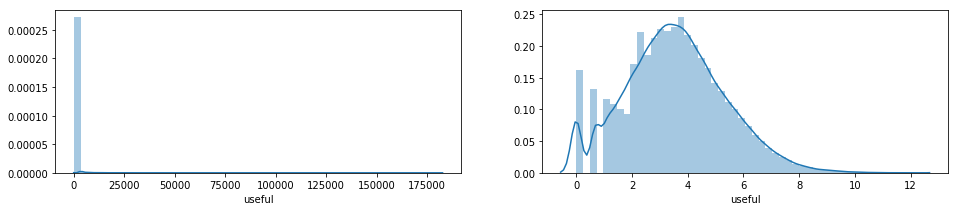

In [ ]:
plt.figure(figsize=(16,3))
plt.subplot(121)
sns.distplot(df.useful)

# Taking a Normal Distribution as useful count heavily skewed
plt.subplot(122)
sns.distplot(df.useful.apply(np.log1p))

> 1. ~94% of people have left reviews tagged useful
> 2. However, people with high count of useful reviews is extremely low
> 3. Out of those 94%, most users tend to have only 2-6 reviews considered/tagged useful 
> 4. Metrics similar to ones for funny, and cool, so plots for those skipped here

*Much more indepth analyses perfomed in the EDA (Exploratory Data Analyses) script, all that skipped here to keep within the confines of this scipts' focus, which is Dimensionality Reduction and KMeans Clustering*

### 4. Scaling Feature Values
Scaling values for easy comparision, and for PCA
> * https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
> * https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

In [ ]:
from sklearn.preprocessing import StandardScaler

# Don't scale columns: yelp_since_year, yelp_since_YRMO, elite
features = ['review_count', 'useful', 'funny', 'cool', 'fans',
       'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos',
       'friend_count', 'elite_count', 'raters', 'tagged_compliment']
x = df.loc[:, features]
x = StandardScaler().fit_transform(x)

In [ ]:
# Adding column names back to data, and converting ndarray back to datafram obj
df_train = pd.DataFrame(x, columns=features)
df_train.head()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,...,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friend_count,elite_count,raters,tagged_compliment
0,4.863201,9.685415,10.049268,8.463317,23.203388,0.036271,11.974259,8.483737,6.901842,24.045284,...,17.403246,27.554803,13.748636,13.748636,12.890299,3.134810,20.568995,3.631109,-0.848293,0.599112
1,8.821195,13.761180,10.311370,13.587434,17.492821,0.405589,11.424759,4.487692,3.395533,15.432670,...,17.042025,15.909356,11.919126,11.919126,7.423623,2.848887,22.315916,6.635045,1.178837,0.599112
2,0.105830,-0.023456,0.028674,-0.003044,0.137514,-0.102223,0.082516,-0.034148,0.071845,-0.056683,...,-0.036492,0.014633,0.081759,0.081759,-0.051221,-0.039923,2.564495,0.126516,-0.848293,0.599112
3,3.856419,4.583191,4.677695,2.959158,7.086517,-0.086835,8.240477,6.696033,3.359009,14.564732,...,16.073953,21.819493,8.439790,8.439790,6.132658,3.164388,4.796069,2.129140,-0.848293,0.599112
4,1.730509,0.884667,0.634848,0.750971,0.670730,-0.163776,1.674657,0.912283,1.131042,1.011548,...,1.003823,0.553684,1.600906,1.600906,1.462873,0.384032,1.468601,0.627172,-0.848293,0.599112


In [ ]:
# Eyebaling central tendency, and qc-ing scaled values
df_train.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,...,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friend_count,elite_count,raters,tagged_compliment
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,...,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,-5.528271e-15,2.008865e-15,-1.173078e-14,8.644087e-15,3.975712e-14,5.909062e-16,-2.063883e-14,6.076751e-14,1.525512e-14,4.262092e-14,...,-2.526496e-14,-2.290757e-14,-5.358191e-14,-5.358191e-14,-4.244605e-15,-6.971151e-15,4.580020e-16,4.145785e-15,5.483523e-14,3.006672e-13
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-4.040422e-01,-1.463692e-01,-1.008591e-01,-1.016576e-01,-1.376938e-01,-4.349377e+00,-7.247108e-02,-8.672784e-02,-3.772752e-02,-5.668302e-02,...,-1.087365e-01,-8.249298e-02,-8.703525e-02,-8.703525e-02,-9.903419e-02,-4.978237e-02,-4.519276e-01,-3.741403e-01,-8.482934e-01,-1.669136e+00
25%,-3.608326e-01,-1.404850e-01,-9.984711e-02,-1.001405e-01,-1.376938e-01,-4.869292e-01,-7.247108e-02,-8.672784e-02,-3.772752e-02,-5.668302e-02,...,-1.087365e-01,-8.249298e-02,-8.703525e-02,-8.703525e-02,-9.903419e-02,-4.978237e-02,-4.193763e-01,-3.741403e-01,-8.482934e-01,-1.669136e+00
50%,-2.830555e-01,-1.254477e-01,-9.377525e-02,-9.558908e-02,-1.204933e-01,6.704732e-02,-7.247108e-02,-8.672784e-02,-3.772752e-02,-5.668302e-02,...,-1.087365e-01,-7.763666e-02,-8.703525e-02,-8.703525e-02,-9.903419e-02,-4.978237e-02,-2.927878e-01,-3.741403e-01,-8.482934e-01,5.991124e-01
75%,-4.540299e-02,-7.575920e-02,-7.049978e-02,-7.586635e-02,-6.889180e-02,6.056356e-01,-6.542621e-02,-3.414831e-02,-3.772752e-02,-5.668302e-02,...,-7.983889e-02,-6.792403e-02,-7.614531e-02,-7.614531e-02,-8.309635e-02,-4.978237e-02,6.889361e-02,-3.741403e-01,1.178837e+00,5.991124e-01
max,6.307078e+01,1.192368e+02,1.682212e+02,1.329987e+02,2.082636e+02,1.805918e+00,1.761832e+02,1.878851e+02,2.067614e+02,1.659865e+02,...,7.561758e+01,8.454367e+01,1.332875e+02,1.332875e+02,1.145737e+02,1.286945e+02,3.184984e+01,7.135701e+00,1.178837e+00,5.991124e-01


### 5. Measuring similarity between fetaures

Comparing covariance for scaled values and correlations for unscaled original df

In [ ]:
# Covariance matrix of scaled data
cov = df_train.cov()
cov.style.background_gradient(cmap='coolwarm').set_precision(2)

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friend_count,elite_count,raters,tagged_compliment
review_count,1,0.66,0.57,0.59,0.49,-0.01,0.34,0.31,0.18,0.22,0.19,0.45,0.4,0.4,0.4,0.45,0.28,0.47,0.67,-0.099,0.21
useful,0.66,1,0.95,0.99,0.59,-9e-05,0.59,0.48,0.31,0.34,0.28,0.68,0.69,0.69,0.69,0.72,0.65,0.54,0.36,-0.035,0.084
funny,0.57,0.95,1,0.96,0.55,-0.0013,0.61,0.49,0.32,0.35,0.28,0.66,0.66,0.7,0.7,0.72,0.64,0.47,0.27,-0.028,0.059
cool,0.59,0.99,0.96,1,0.55,0.007,0.59,0.47,0.31,0.33,0.26,0.66,0.68,0.69,0.69,0.71,0.67,0.5,0.29,-0.018,0.06
fans,0.49,0.59,0.55,0.55,1,0.0092,0.4,0.32,0.19,0.32,0.22,0.52,0.57,0.46,0.46,0.46,0.36,0.57,0.33,-0.02,0.079
average_stars,-0.01,-9e-05,-0.0013,0.007,0.0092,1,0.0036,-0.0013,-0.00042,0.00064,-0.0021,0.00092,0.0069,0.0047,0.0047,0.0036,0.0062,0.047,0.02,0.72,-0.021
compliment_hot,0.34,0.59,0.61,0.59,0.4,0.0036,1,0.76,0.68,0.8,0.61,0.81,0.75,0.94,0.94,0.87,0.77,0.37,0.21,-0.017,0.043
compliment_more,0.31,0.48,0.49,0.47,0.32,-0.0013,0.76,1,0.93,0.81,0.89,0.76,0.6,0.73,0.73,0.83,0.62,0.3,0.2,-0.024,0.052
compliment_profile,0.18,0.31,0.32,0.31,0.19,-0.00042,0.68,0.93,1,0.83,0.92,0.62,0.44,0.62,0.62,0.71,0.55,0.17,0.1,-0.011,0.023
compliment_cute,0.22,0.34,0.35,0.33,0.32,0.00064,0.8,0.81,0.83,1,0.83,0.65,0.53,0.68,0.68,0.68,0.49,0.27,0.15,-0.017,0.034


In [ ]:
# Correlation matrix of unscaled original data which includes, elite count, yrmo features etc
# Idea is to see which features are correlated and can be combined (PCA) together to build a hypothesis/cluster

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friend_count,elite_count,yelp_since_YRMO,yelp_since_year,tagged_compliment,raters
review_count,1,0.66,0.57,0.59,0.49,-0.01,0.34,0.31,0.18,0.22,0.19,0.45,0.4,0.4,0.4,0.45,0.28,0.47,0.67,-0.17,-0.16,0.21,-0.099
useful,0.66,1,0.95,0.99,0.59,-9e-05,0.59,0.48,0.31,0.34,0.28,0.68,0.69,0.69,0.69,0.72,0.65,0.54,0.36,-0.075,-0.075,0.084,-0.035
funny,0.57,0.95,1,0.96,0.55,-0.0013,0.61,0.49,0.32,0.35,0.28,0.66,0.66,0.7,0.7,0.72,0.64,0.47,0.27,-0.063,-0.063,0.059,-0.028
cool,0.59,0.99,0.96,1,0.55,0.007,0.59,0.47,0.31,0.33,0.26,0.66,0.68,0.69,0.69,0.71,0.67,0.5,0.29,-0.054,-0.054,0.06,-0.018
fans,0.49,0.59,0.55,0.55,1,0.0092,0.4,0.32,0.19,0.32,0.22,0.52,0.57,0.46,0.46,0.46,0.36,0.57,0.33,-0.069,-0.069,0.079,-0.02
average_stars,-0.01,-9e-05,-0.0013,0.007,0.0092,1,0.0036,-0.0013,-0.00042,0.00064,-0.0021,0.00092,0.0069,0.0047,0.0047,0.0036,0.0062,0.047,0.02,0.039,0.039,-0.021,0.72
compliment_hot,0.34,0.59,0.61,0.59,0.4,0.0036,1,0.76,0.68,0.8,0.6,0.81,0.75,0.94,0.94,0.87,0.77,0.37,0.21,-0.064,-0.064,0.043,-0.017
compliment_more,0.31,0.48,0.49,0.47,0.32,-0.0013,0.76,1,0.93,0.81,0.89,0.76,0.6,0.73,0.73,0.83,0.62,0.3,0.2,-0.066,-0.066,0.052,-0.024
compliment_profile,0.18,0.31,0.32,0.31,0.19,-0.00042,0.68,0.93,1,0.83,0.92,0.62,0.44,0.62,0.62,0.71,0.55,0.17,0.1,-0.033,-0.033,0.023,-0.011
compliment_cute,0.22,0.34,0.35,0.33,0.32,0.00064,0.8,0.81,0.83,1,0.83,0.65,0.53,0.68,0.68,0.68,0.49,0.27,0.15,-0.069,-0.069,0.034,-0.017


**Insights from Correlation and Covariance Matrix:**
> 1. Review count is correlated with useful-funny-cool and elite_count (Hyp: elite users review more)
> 2. Useful-Funny-Cool are highly coorelated, and show high covariance
> 3. Fan counts are correlated with Freinds count ~75% (Hyp: popularity measure)
> 4. Moderate correlation b/w all the compliment tags (Hyp: Logically can be combined)

### 6. Dimensionality Reduction using PCA

In [ ]:
df_train.columns

Index(['review_count', 'useful', 'funny', 'cool', 'fans', 'average_stars',
       'compliment_hot', 'compliment_more', 'compliment_profile',
       'compliment_cute', 'compliment_list', 'compliment_note',
       'compliment_plain', 'compliment_cool', 'compliment_funny',
       'compliment_writer', 'compliment_photos', 'friend_count', 'elite_count',
       'raters', 'tagged_compliment'],
      dtype='object')

**6.1 Principal Component 1**
> review_feedback:  features include useful, funny, and cool

In [ ]:
df_review = df_train.loc[:, ['funny', 'cool', 'useful']]  # Make df of these 3 features
pca = PCA(n_components=1)
review_feedback = pca.fit_transform(df_review)
review_feedback = pd.DataFrame(data=review_feedback)

In [ ]:
print('PCA Components:', pca.components_)
print('Ratio of Variance Explained:', pca.explained_variance_ratio_ )

PCA Components: [[0.57267556 0.58094188 0.57840231]]
Ratio of Variance Explained: [0.97807812]


review_feedback feature, exlains an overwhelming majority of variance ~99%

**6.2 Principal Component 2**
> compliments_feedback:  features include all tagged compliments

In [ ]:
df_compliments = df_train.loc[:, ['compliment_hot', 'compliment_more', 'compliment_profile',
       'compliment_cute', 'compliment_list', 'compliment_note',
       'compliment_plain', 'compliment_cool', 'compliment_funny',
       'compliment_writer', 'compliment_photos']]
pca = PCA(n_components=1)
compliments_feedback = pca.fit_transform(df_compliments)
compliments_feedback = pd.DataFrame(data=compliments_feedback)

In [ ]:
print('PCA Components:', pca.components_)
print('Ratio of Variance Explained:', pca.explained_variance_ratio_ )

PCA Components: [[0.32252752 0.31011734 0.28252166 0.28534954 0.26364672 0.30877992
  0.28193023 0.32553147 0.32553147 0.3240906  0.27792969]]
Ratio of Variance Explained: [0.76324183]


**6.3 Principal Component 3**
> popularity_feedback:  features include fans, freind_count

In [ ]:
df_popularity = df_train.loc[:, ['fans', 'friend_count']]
pca = PCA(n_components=1)
popularity_feedback = pca.fit_transform(df_popularity)
popularity_feedback = pd.DataFrame(data=popularity_feedback)

In [ ]:
print('PCA Components:', pca.components_)
print('Ratio of Variance Explained:', pca.explained_variance_ratio_ )

PCA Components: [[0.70710678 0.70710678]]
Ratio of Variance Explained: [0.78255964]


**6.4 Principal Component 4**
> active_feedback:  features include review_count, elite_count

In [ ]:
df_active = df_train.loc[:, ['review_count', 'elite_count']]
pca4 = PCA(n_components=1)
active_feedback = pca4.fit_transform(df_active)
active_feedback = pd.DataFrame(data=active_feedback)

In [ ]:
print('PCA Components:', pca.components_)
print('Ratio of Variance Explained:', pca.explained_variance_ratio_ )

PCA Components: [[0.70710678 0.70710678]]
Ratio of Variance Explained: [0.78255964]


### 7. Clustering

**7.1 Review Feedback (useful, funny, cool) vs Avg Stars Ratings**

**Using Elbow method to find ideal k number of clusters**
* Score used: Calinski Harabasz
* Ref: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html##targetText=K%2Dmeans%20is%20a%20simple,number%20(k)%20of%20clusters.&targetText=The%20elbow%20method%20runs%20k,average%20score%20for%20all%20clusters

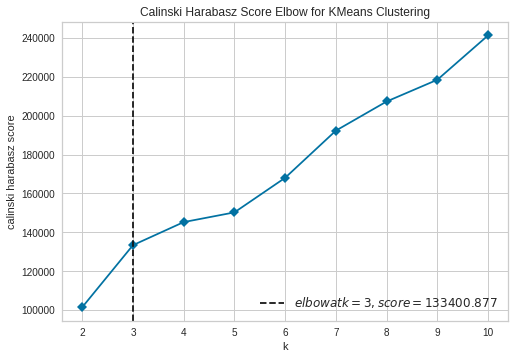

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
comp_star = pd.concat([compliments_feedback, df.loc[:,'average_stars']], axis=1)
model = KElbowVisualizer(KMeans(), k=10, metric='calinski_harabasz', timings=False)
model.fit(comp_star)
model.show()

**K-cluster value extraction only showed once, as repeated runs make the script run slow**

In [ ]:
# Reset matplotlib parameters, changed by elbow visualizer
mpl.rcParams.update(mpl.rcParamsDefault)

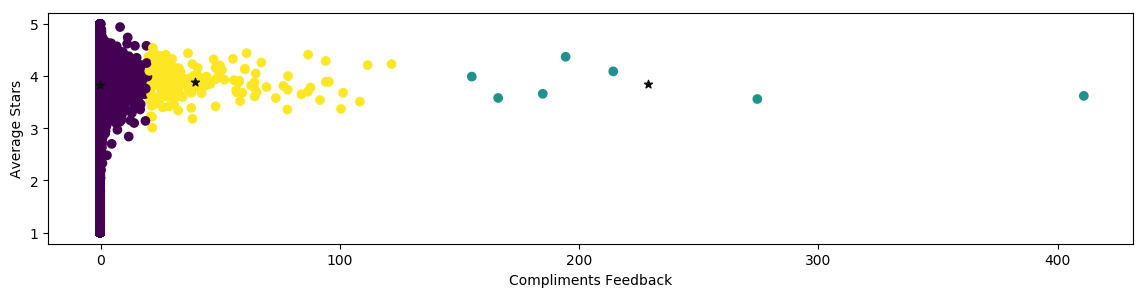

In [ ]:
model = KMeans(n_clusters=3)
model.fit(comp_star)
all_predictions = model.predict(comp_star)
centroids = model.cluster_centers_

plt.figure(figsize=(14, 3))
plt.scatter(comp_star.iloc[:,0].values, comp_star.iloc[:,1].values, c=all_predictions)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='#0f0f0f')
plt.xlabel('Compliments Feedback')
plt.ylabel('Average Stars')
plt.show()

Insight:
> Lets call each centroid/cluster, low_complimented, moderately_complimented, highly_complimented users.
> 1. low_complimented users with low count of compliments_feedback, or the leftmost centroid/cluster depict that users who get low/occasional compliments, rate across the spectrum of average ratings, but mostly staying at the center (3.5-4 avg).
> 2. moderately_complimented users, who have a higher numder of compliments, rate in a stricter margin of 3-4.5 star avg rating, with majority at 4, which means users with moderate compliments, rate more highly on average. 
> 3. highly_complimented users, are low in numbers, as opposed to others, and if we assume their sample sparsity is representative of the population, then we can say they also on average rate highly or above 4 stars in most cases, but show wider variance as opposed to moderately complimented users. 

> Using Assumption 1: That sample sparsity is represenattive of population, and Assumption 2: Normal Distribution of overall avg ratings is not accounted by Bessels Correction, we can say that if a user has moderate compliments, then we can expect them to show a tight variance of high avg ratings.

**7.2 Active Feedback (review count, elite status achieved count) vs Avg Stars Ratings**

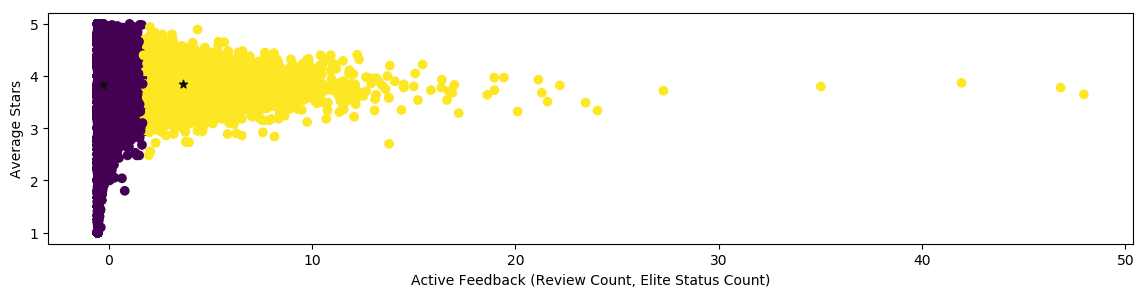

In [ ]:
act_star = pd.concat([active_feedback, df.loc[:,'average_stars']], axis=1)
model = KMeans(n_clusters=2)
model.fit(act_star)
all_predictions = model.predict(act_star)
centroids = model.cluster_centers_

plt.figure(figsize=(14, 3))
plt.scatter(act_star.iloc[:,0].values, act_star.iloc[:,1].values, c=all_predictions)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='#0f0f0f')
plt.xlabel('Active Feedback (Review Count, Elite Status Count)')
plt.ylabel('Average Stars')
plt.show()

Insight:
> Lets call each centroid/cluster, less_active, and more_active users.
> 1. less_active users with lower count of reviews and who have achieved elite status less number of times, again rate across the spectrum, and show higher variance as opposed to more_active users. The funnel of the cluster is tigher and more widely spread than more_active users. 
> 2. more_active users, or ones with higher review count and more number of elite statuses, have almost non-existent low average ratings as opposed to less-active users, and as number amount of active_feedback increases, users' averages start accumulating towards the center at 3.5-4 avg star ratings, even for a very high amount of activity >20.

> Using assumptions from 7.1, we can tentatively say (can't be sure w/o chi square, or other hypothesis testing methodologies), that if we see a yelp yser who is very active, then their average rating may fall somewhere between 3.5 - 4. It is important to note, that the normal distribution of ratings also lie at the center, so we dont want to read too much into the data, but as very high active_feedback users lie in the center, we may relatively safely say that there is a tendency for average ratings to fall at 3.5-4range, which is actually a known observation in online ratings. 

**7.3 Popularity Feedback (Friend Count, Fans Count) vs Avg Stars Ratings**

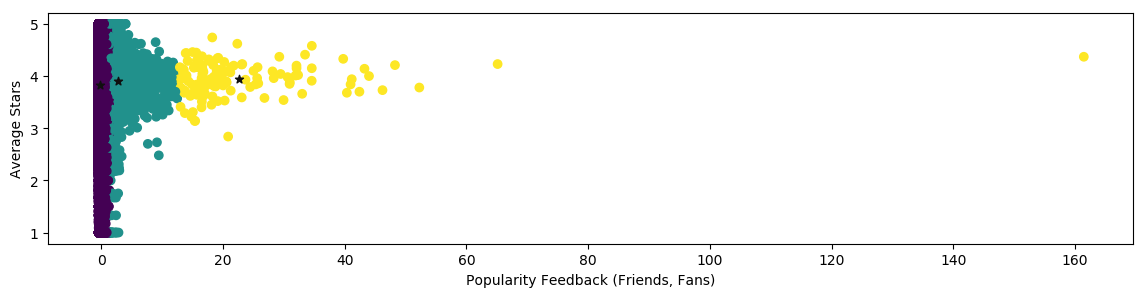

In [ ]:
pop_stars = pd.concat([popularity_feedback, df.loc[:,'average_stars']], axis=1)
model = KMeans(n_clusters=3)
model.fit(pop_stars)
all_predictions = model.predict(pop_stars)
centroids = model.cluster_centers_

plt.figure(figsize=(14, 3))
plt.scatter(pop_stars.iloc[:,0].values, pop_stars.iloc[:,1].values, c=all_predictions)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='#0f0f0f')
plt.xlabel('Popularity Feedback (Friends, Fans)')
plt.ylabel('Average Stars')
plt.show()

Insight:
> Lets call each centroid/cluster, less_popular, moderately_popular, paris_hilton users.
> 1. less_popular users with lower number of fans and freinds, tend to extremely uniformly rate across the spectrum, as opposed to any other user block. 
> 2. moderately_popular users, with rising popularity tend to start diverging from the behavior of less popular users. As the centroid lies smack dab in the middle, yet lower end of the popularity matrix, showing that mode_popular users also have a tendency to have avg ratings more or less across the board, but some do always vote highly (>4 or >5 are there)
> 3. paris_hilton users, who rate highly on the popularity index do not as opposed to previous 2 segments, have large high avg ratings, but lie majoritarily in the center.

> Using assumptions from 7.1, as w/o hypothesis testing, and not acoounting for the implicit central tendecy the ratings itself, we may say that if a user is less popular then they may have avg raatings across the borad, but if they are super popular then we can expect them to them have ratings in middel brackett. 

**7.4 Review Feedback (funny, cool, useful) vs Popularity Feedback (Fan Count, Friends Count)**

In [ ]:
rev_pop = pd.concat([review_feedback, popularity_feedback], axis=1)
print("Correlation: {:0.02%}".format((rev_pop.corr()).iloc[0,1]))

Correlation: 60.96%


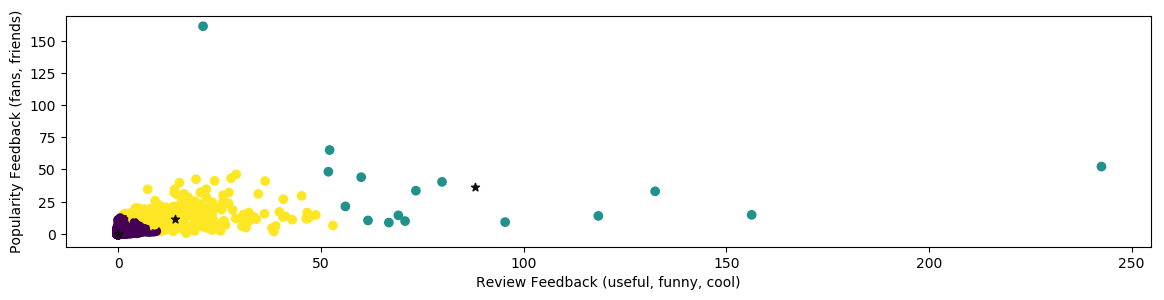

In [ ]:
model = KMeans(n_clusters=3)
model.fit(rev_pop)
all_predictions = model.predict(rev_pop)
centroids = model.cluster_centers_

plt.figure(figsize=(14, 3))
plt.scatter(rev_pop.iloc[:,0].values, rev_pop.iloc[:,1].values, c=all_predictions)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='#0f0f0f')
plt.xlabel('Review Feedback (useful, funny, cool)')
plt.ylabel('Popularity Feedback (fans, friends)')
plt.show()

Insight:
> Lets call each centroid/cluster (left to right), low_target_seg, mid_target_seg, high_target_seg users.


> 1. low_target_seg users have review feedback extremely low, and as all reviews are highly correlated (~99%), we can say they have reveies tagged useful least number of times, and also score low on the popularity index. From a buisness perspective, we may consider them as last to approach for targetted advertisement via Yelp ads or in other ways.
> 2. mid_target_seg users, are moderately targettable segment, as they have some amount of reviews marked as useful, and have relatively speaking a fair amount of poularity in terms of number of fans and friends. We also show via correlation (not causation) that users with some helpful reviews have some popularity.
> 3. high_target_seg, or very useful reviewers,they have a high number of reviews that were considered useful by fellow members, and have a relatively large fan and freind following. As the user number is low, reviews usefulness is high, and popularity is also high (thereby increasing review visibility), these may be targetted by Yelp Service Providers for high volume, or high worth advertisements. 


> Keeping in mind all the assumptions mentioned in previous insights, we may say that useful or high review feedback index users have larger followings.

**7.5 Review Feedback (funny, cool, useful) vs Active Feedback (Review Count, Elite Status Count)**

In [ ]:
rev_act = pd.concat([review_feedback, active_feedback], axis=1)
print("Correlation: {:0.02%}".format((rev_act.corr()).iloc[0,1]))

Correlation: 50.47%


Text(0, 0.5, 'Active Feedback (review, elite counts)')

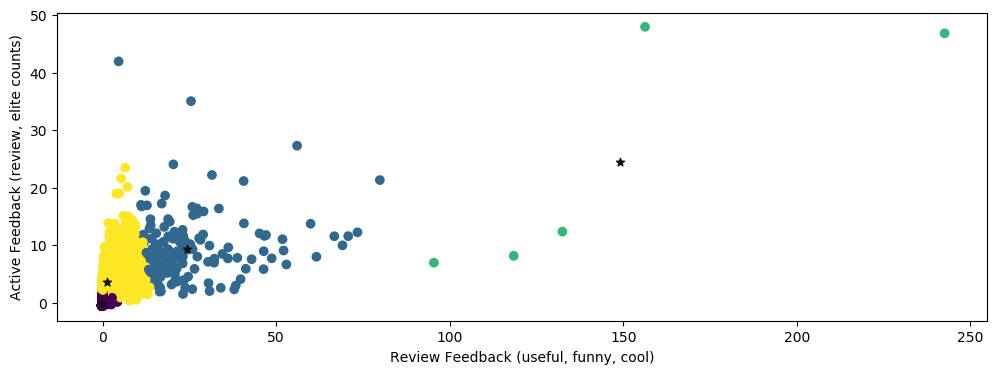

In [ ]:
model = KMeans(n_clusters=4)
model.fit(rev_act)
all_predictions = model.predict(rev_act)
centroids = model.cluster_centers_

plt.figure(figsize=(12,4))
plt.scatter(rev_act.iloc[:,0].values, rev_act.iloc[:,1].values, c=all_predictions)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='#0f0f0f')
plt.xlabel('Review Feedback (useful, funny, cool)')
plt.ylabel('Active Feedback (review, elite counts)')

Insight:
> Lets call each centroid/cluster (left to right), poor_reviewers, avg_reviewers, good_reviewers, and great_reviewers.

> Correlation calculated earlier is ~50%. Important metric used in insights.

> It is interesting to see that Review Feedback is very poorly correlated with User Activity or active feedback. If we ignore, poor_reviewers clusters, which essentially just shows not active and not useful review writers, we can focus on other 3 segments. If we see the broad distribution or the centroid positions for other 3 segments we notice, that without a significant change in active feedback (more apparent in good & great reviewers), there is a rather discrenable differnce in thier review usefulness/feedback. There are many good_reviewrs who are very active but have not scored highly on review usefullness. Whereas great_reviewers with majoritarily similar spreads on active feedback (y-axis) vary in a wide range across thier usefullness in terms of writing reviews. 

> If we just consider the range of good and great reviewers on active/y_axis (which is not a good metric by itself, but highlights the low correlation), we see that good_reviewers segments have a wider range of activity metrics but perform comparitevly poor on review feedback metrics. 

> Furthermore, in just the great_reviewers spread on review/x-axis, similar levels of "activity" also produces wast amounts of varying review usefullness (or greatness?). Since, Review Feedback consists of highly correlated review_useful_count and Active Feedback also consists of correlated review_count feature, one might further (an untested, non Hypothesis verified, bead on sample data) statement that greatness (review usefulness) has alsmot little to do with number of reviews one writes.


# <font color='red'>**Content Based Recommendation Notebook Link: https://colab.research.google.com/drive/1NNStgonzWLW7GGjvnYk-lt4jIkcqFMgp?usp=sharing**<br><br>**Content Based Recommendation Files Link: https://drive.google.com/drive/folders/1ErWANgQkVyg07L1jJlw7I286dQiF6KHC?usp=sharing**</font>